## Capstone Project: BFSI

### Data Understanding

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load demographic data
demo_data = pd.read_csv("Demographic data.csv", sep=",")

In [4]:
#Load credit bureau data
cred_data = pd.read_csv("Credit Bureau data.csv", sep=",")

In [5]:
demo_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [6]:
cred_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [7]:
demo_data.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [8]:
cred_data.head()

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [9]:
demo_data.shape

(71295, 12)

In [10]:
# check for any duplicate entries in the unique field Application ID
demo_data['Application ID'].nunique()

71292

In [11]:
# there were 3 duplicate entries in Application ID and removing them from the dataset
demo_data = demo_data.drop_duplicates(['Application ID'])

In [12]:
cred_data.shape

(71295, 19)

In [13]:
# check for any duplicate entries in the unique field Application ID
cred_data['Application ID'].nunique()

71292

In [14]:
# there were 3 duplicate entries in Application ID and removing them from the dataset
cred_data = cred_data.drop_duplicates(['Application ID'])

In [15]:
demo_data.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

In [16]:
cred_data.columns

Index(['Application ID', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Performance Tag'],
      dtype='object')

### Data Cleaning and Preparation

In [17]:
# percentage of null in each column
round(demo_data.isnull().sum()/len(demo_data.index), 2)*100

Application ID                                 0.0
Age                                            0.0
Gender                                         0.0
Marital Status (at the time of application)    0.0
No of dependents                               0.0
Income                                         0.0
Education                                      0.0
Profession                                     0.0
Type of residence                              0.0
No of months in current residence              0.0
No of months in current company                0.0
Performance Tag                                2.0
dtype: float64

In [18]:
# percentage of null in each column
round(cred_data.isnull().sum()/len(cred_data.index), 2)*100

Application ID                                                     0.0
No of times 90 DPD or worse in last 6 months                       0.0
No of times 60 DPD or worse in last 6 months                       0.0
No of times 30 DPD or worse in last 6 months                       0.0
No of times 90 DPD or worse in last 12 months                      0.0
No of times 60 DPD or worse in last 12 months                      0.0
No of times 30 DPD or worse in last 12 months                      0.0
Avgas CC Utilization in last 12 months                             1.0
No of trades opened in last 6 months                               0.0
No of trades opened in last 12 months                              0.0
No of PL trades opened in last 6 months                            0.0
No of PL trades opened in last 12 months                           0.0
No of Inquiries in last 6 months (excluding home & auto loans)     0.0
No of Inquiries in last 12 months (excluding home & auto loans)    0.0
Presen

In [19]:
demo_data[demo_data.duplicated()]
#there are no duplicates in the demographic data

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag


In [20]:
cred_data[cred_data.duplicated()]
#there are no duplicates in the credit bureau data data

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag


In [21]:
#Let us merge the dataset of demographic data ans credit bureau data.
# merging the two dfs
master = pd.merge(demo_data, cred_data, how="inner", left_on="Application ID", right_on="Application ID")
master.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [22]:
# print column names
master.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag_x', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto lo

In [23]:
master.shape

(71292, 30)

In [24]:
master['Application ID'].nunique()

71292

In [25]:
# column-wise missing values 
master.isnull().sum()

Application ID                                                        0
Age                                                                   0
Gender                                                                2
Marital Status (at the time of application)                           6
No of dependents                                                      3
Income                                                                0
Education                                                           119
Profession                                                           14
Type of residence                                                     8
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag_x                                                  1425
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                    

In [26]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

Application ID                                                     0.00
Age                                                                0.00
Gender                                                             0.00
Marital Status (at the time of application)                        0.01
No of dependents                                                   0.00
Income                                                             0.00
Education                                                          0.17
Profession                                                         0.02
Type of residence                                                  0.01
No of months in current residence                                  0.00
No of months in current company                                    0.00
Performance Tag_x                                                  2.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                    

In [27]:
#Now we can drop the column Performance Tag_y and rename Performance Tag_x as Performance Tag
master = master.drop(['Performance Tag_y'], axis=1)
master = master.rename(columns={'Performance Tag_x': 'Performance Tag'})

In [28]:
#Rename Marital Status column as well
master = master.rename(columns={'Marital Status (at the time of application)': 'Marital Status'})

In [29]:
# create a master dataset with only rejected data(Performance tag = NaN) to check later in the modelling stage
master_rejected = master[np.isnan(master['Performance Tag'])]
master_rejected.shape

(1425, 29)

In [30]:
# removing NaNs from the Performance Tag as it is a target variable
master = master[~np.isnan(master['Performance Tag'])]
round(100*(master.isnull().sum()/len(master.index)), 2)

Application ID                                                     0.00
Age                                                                0.00
Gender                                                             0.00
Marital Status                                                     0.01
No of dependents                                                   0.00
Income                                                             0.00
Education                                                          0.17
Profession                                                         0.02
Type of residence                                                  0.01
No of months in current residence                                  0.00
No of months in current company                                    0.00
Performance Tag                                                    0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                    

In [31]:
#we see that Marital Status, Education, Profession, Type of residence, Avgas CC Utilization,
#Presence of open home loan, and Outstanding Balance have NA's, so we will remove them one by one
master = master.dropna(axis = 0, how = 'any')
round(100*(master.isnull().sum()/len(master.index)), 2)

Application ID                                                     0.0
Age                                                                0.0
Gender                                                             0.0
Marital Status                                                     0.0
No of dependents                                                   0.0
Income                                                             0.0
Education                                                          0.0
Profession                                                         0.0
Type of residence                                                  0.0
No of months in current residence                                  0.0
No of months in current company                                    0.0
Performance Tag                                                    0.0
No of times 90 DPD or worse in last 6 months                       0.0
No of times 60 DPD or worse in last 6 months                       0.0
No of 

In [32]:
master.columns

Index(['Application ID', 'Age', 'Gender', 'Marital Status', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home l

In [33]:
#copy the data into a new dataframe for future refrences
master_copy = master

In [34]:
# Let us keep the records only where the applicants are not minor
master = master[master['Age']>18]

In [35]:
#Let us keep records only where the income is more than 0
master = master[master['Income']>=0]

In [36]:
master = master.rename(columns={'Profession ': 'Profession'})

In [37]:
master.to_csv('master_credx.csv')

### EDA

Let us analyse each column

In [38]:
master_eda = master.copy()

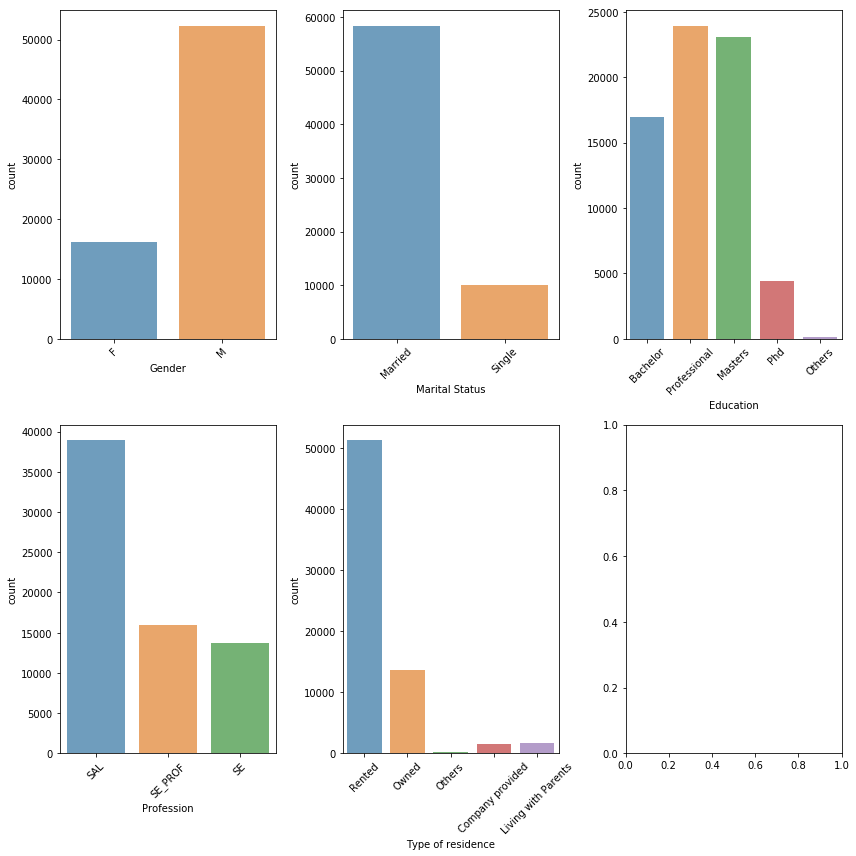

In [39]:
#EDA for categorical variables
df_categ = master_eda.select_dtypes(include = ['O'])
fig, axes = plt.subplots(round(len(df_categ.columns)/3), 3
                         , figsize=(12, 12))

for i, ax in enumerate(fig.axes):
    if i < len(df_categ.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_categ.columns[i], alpha=0.7, data=df_categ, ax=ax)

fig.tight_layout()

#### Age

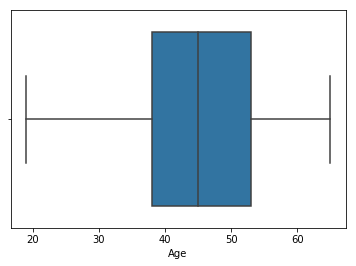

In [40]:
sns.boxplot(x='Age', data=master_eda)
plt.show()

In [41]:
# To understand the behaviour of people with age, we are going to bucket the age groups into brackets of 10 and 
# study the response rates
bins = np.arange(10,master_eda['Age'].max() + 10, 10)
master_eda['age_bins'] = pd.cut(master_eda['Age'], bins, include_lowest=True)

In [42]:
No_of_prospect = master_eda.groupby('age_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('age_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_age = No_of_prospect.merge(count_prospects, on='age_bins')
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

In [43]:
agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",51,2,3.9
1,"(20.0, 30.0]",5673,233,4.1
2,"(30.0, 40.0]",18343,818,4.5
3,"(40.0, 50.0]",22465,936,4.2
4,"(50.0, 60.0]",17241,706,4.1
5,"(60.0, 70.0]",4765,196,4.1


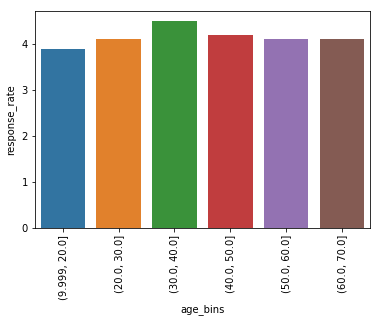

In [44]:
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We see that the response rate is higher in the age group of 30 to 40.

#### Gender

In [45]:
master_eda['Gender'].value_counts()

M    52344
F    16194
Name: Gender, dtype: int64

In [46]:
No_of_prospect = master_eda.groupby('Gender')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('Gender')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_gender = No_of_prospect.merge(count_prospects, on='Gender')
agg_gender['response_rate'] = 100*(agg_gender['count_prospects']/agg_gender['No.of_prospect']).round(3)

In [47]:
agg_gender

,Gender,No.of_prospect,count_prospects,response_rate
0,F,16194,703,4.3
1,M,52344,2188,4.2


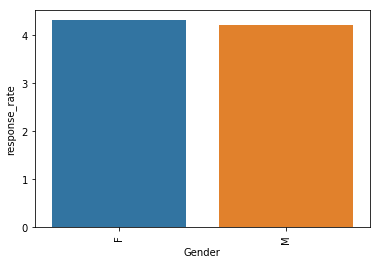

In [48]:
ax = sns.barplot(x='Gender', y='response_rate', data=agg_gender)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We see that there are more number of male applicants

#### Marital Status

In [49]:
master_eda['Marital Status'].value_counts()

Married    58418
Single     10120
Name: Marital Status, dtype: int64

In [50]:
No_of_prospect = master_eda.groupby('Marital Status')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('Marital Status')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_marital = No_of_prospect.merge(count_prospects, on='Marital Status')
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No.of_prospect']).round(3)

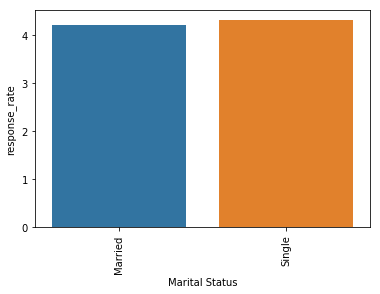

In [51]:
ax = sns.barplot(x='Marital Status', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Most of the applicants are single.

#### Education

In [52]:
master_eda['Education'].value_counts()

Professional    23956
Masters         23082
Bachelor        16998
Phd              4389
Others            113
Name: Education, dtype: int64

In [53]:
No_of_prospect = master_eda.groupby('Education')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('Education')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_edu = No_of_prospect.merge(count_prospects, on='Education')
agg_edu['response_rate'] = 100*(agg_edu['count_prospects']/agg_edu['No.of_prospect']).round(3)

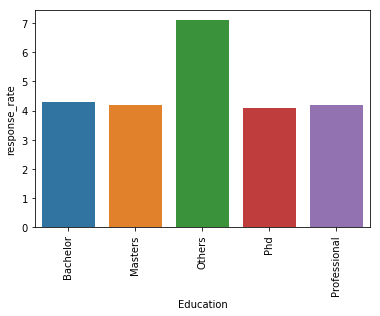

In [54]:
ax = sns.barplot(x='Education', y='response_rate', data=agg_edu)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Reponse rate is higher in Phd holders

#### Profession

In [55]:
master_eda['Profession'].value_counts()

SAL        38932
SE_PROF    15934
SE         13672
Name: Profession, dtype: int64

In [56]:
No_of_prospect = master_eda.groupby('Profession')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('Profession')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_prof = No_of_prospect.merge(count_prospects, on='Profession')
agg_prof['response_rate'] = 100*(agg_prof['count_prospects']/agg_prof['No.of_prospect']).round(3)

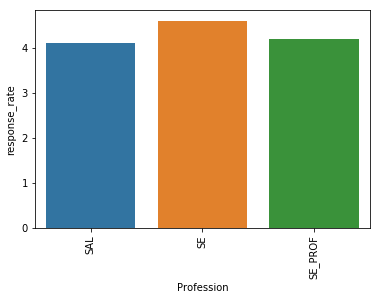

In [57]:
ax = sns.barplot(x='Profession', y='response_rate', data=agg_prof)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

SE_PROF have higher response rate

#### Type of Residence

In [58]:
master_eda['Type of residence'].value_counts()

Rented                 51306
Owned                  13736
Living with Parents     1727
Company provided        1574
Others                   195
Name: Type of residence, dtype: int64

In [59]:
No_of_prospect = master_eda.groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('Type of residence')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_resi = No_of_prospect.merge(count_prospects, on='Type of residence')
agg_resi['response_rate'] = 100*(agg_resi['count_prospects']/agg_resi['No.of_prospect']).round(3)

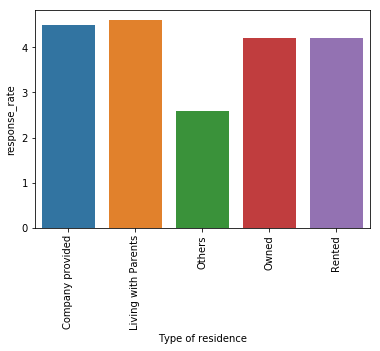

In [60]:
ax = sns.barplot(x='Type of residence', y='response_rate', data=agg_resi)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Response rate is higher when people have a own house compared to people who have rented house

#### No Of Dependents

In [61]:
master_eda['No of dependents'].value_counts()

3.0    15331
1.0    14924
2.0    14848
4.0    11788
5.0    11647
Name: No of dependents, dtype: int64

In [62]:
No_of_prospect = master_eda.groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of dependents')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_depend = No_of_prospect.merge(count_prospects, on='No of dependents')
agg_depend['response_rate'] = 100*(agg_depend['count_prospects']/agg_depend['No.of_prospect']).round(3)

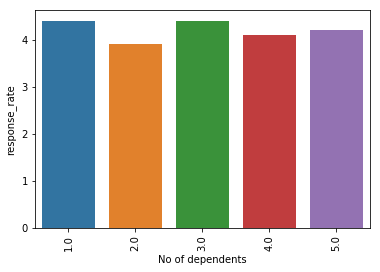

In [63]:
ax = sns.barplot(x='No of dependents', y='response_rate', data=agg_depend)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

The number of dependents where it is 3 have high response rate

#### Income

In [64]:
master_eda['Income'].value_counts()

4.5     4826
33.0    1410
35.0    1406
31.0    1402
26.0    1399
23.0    1397
20.0    1385
15.0    1363
17.0    1360
21.0    1355
37.0    1347
22.0    1345
28.0    1339
39.0    1337
29.0    1336
41.0    1330
32.0    1329
16.0    1325
19.0    1324
10.0    1315
27.0    1314
13.0    1311
30.0    1310
25.0    1307
44.0    1307
6.0     1298
40.0    1294
11.0    1291
38.0    1289
43.0    1288
        ... 
18.0    1274
36.0    1274
9.0     1273
45.0    1268
14.0    1261
24.0    1256
7.0     1242
12.0    1237
42.0    1231
5.0     1191
46.0     895
49.0     843
50.0     833
47.0     823
48.0     822
52.0     646
55.0     639
54.0     614
53.0     608
51.0     581
56.0     518
57.0     500
59.0     482
58.0     467
60.0     441
4.0       37
0.0       25
3.0       23
1.0       16
2.0        8
Name: Income, Length: 62, dtype: int64

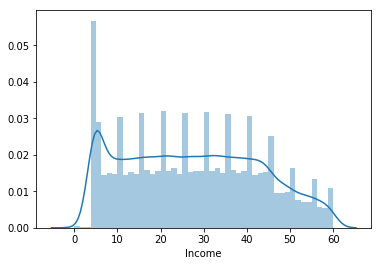

In [65]:
sns.distplot(master_eda['Income'])
plt.show()

In [66]:
#Let us create bins for Income
bins = np.arange(0,master_eda['Income'].max() + 10, 10)
master_eda['income_bins'] = pd.cut(master_eda['Income'], bins, include_lowest=True)


In [67]:
No_of_prospect = master_eda.groupby('income_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('income_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_income = No_of_prospect.merge(count_prospects, on='income_bins')
agg_income['response_rate'] = 100*(agg_income['count_prospects']/agg_income['No.of_prospect']).round(3)

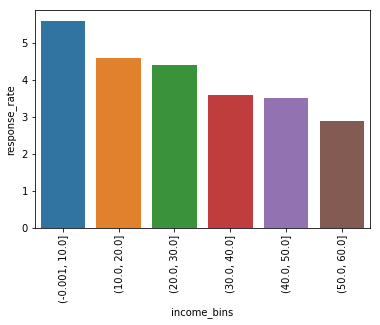

In [68]:
ax = sns.barplot(x='income_bins', y='response_rate', data=agg_income)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

People who have lesser salary have more reponse rate

#### No of months in current residence

In [69]:
master_eda['No of months in current residence']

0        113
1        112
2        104
3         94
4        112
6        104
7        108
8        115
9        111
10       112
11        90
12        83
13       106
14       108
15        81
16       100
17       115
18       115
19       107
20       111
21       113
22        96
23        96
24        92
25       103
26        82
27        97
28       113
29        94
30        80
        ... 
69995     15
69996     11
69997     16
69998     61
69999     35
70000     59
70001     23
70002     33
70003     41
70004     59
70005     40
70006      8
70007      8
70008     91
70009     15
71246     86
71247     60
71248     84
71249     94
71250      6
71251      6
71252      6
71253     80
71274     81
71275     62
71276     15
71277      6
71278      6
71290     76
71291     96
Name: No of months in current residence, Length: 68538, dtype: int64

In [70]:
#Let us create bins for No of months in current residence
bins = np.arange(5,master_eda['No of months in current residence'].max() + 6, 12)
master_eda['residence_bins'] = pd.cut(master_eda['No of months in current residence'], bins, include_lowest=True)

In [71]:
No_of_prospect = master_eda.groupby('residence_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('residence_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_resi = No_of_prospect.merge(count_prospects, on='residence_bins')
agg_resi['response_rate'] = 100*(agg_resi['count_prospects']/agg_resi['No.of_prospect']).round(3)

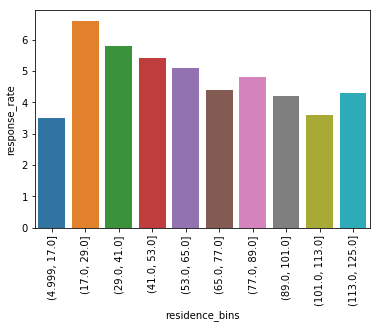

In [72]:
ax = sns.barplot(x='residence_bins', y='response_rate', data=agg_resi)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### No of months in current company

In [73]:
master_eda['No of months in current company'].value_counts()

3      4621
27     1055
44     1053
40     1043
38     1040
43     1037
54     1033
57     1032
53     1030
41     1028
48     1024
55     1020
51     1018
29     1017
36     1013
24     1013
12     1012
31     1009
46     1005
45     1005
39     1003
34     1002
56     1000
42     1000
19      994
50      994
52      994
13      993
33      993
26      992
       ... 
21      945
20      943
4       913
11      883
62      877
60      874
59      858
61      825
71      498
65      495
64      495
63      487
67      481
70      474
69      469
72      464
66      460
68      455
75      454
73      451
74      405
128       1
123       1
121       1
96        1
105       1
133       1
126       1
83        1
91        1
Name: No of months in current company, Length: 82, dtype: int64

In [74]:
#Let us create bins for No of months in current company
bins = np.arange(5,master_eda['No of months in current company'].max() + 6, 12)
master_eda['company_bins'] = pd.cut(master_eda['No of months in current company'], bins, include_lowest=True)

In [75]:
No_of_prospect = master_eda.groupby('company_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('company_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_comp = No_of_prospect.merge(count_prospects, on='company_bins')
agg_comp['response_rate'] = 100*(agg_comp['count_prospects']/agg_comp['No.of_prospect']).round(3)

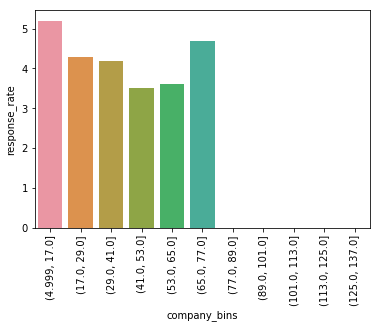

In [76]:
ax = sns.barplot(x='company_bins', y='response_rate', data=agg_comp)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

People who have less experience are potential targets

#### No of times 90 DPD or worse in last 6 months

In [77]:
master_eda['No of times 90 DPD or worse in last 6 months'].value_counts()

0    53407
1    13165
2     1761
3      205
Name: No of times 90 DPD or worse in last 6 months, dtype: int64

In [78]:
No_of_prospect = master_eda.groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of times 90 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_90dpd = No_of_prospect.merge(count_prospects, on='No of times 90 DPD or worse in last 6 months')
agg_90dpd['response_rate'] = 100*(agg_90dpd['count_prospects']/agg_90dpd['No.of_prospect']).round(3)

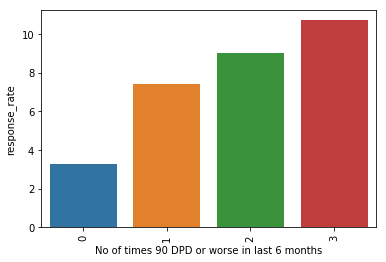

In [79]:
ax = sns.barplot(x='No of times 90 DPD or worse in last 6 months', y='response_rate', data=agg_90dpd)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

People who have defaulted more than 3 times is high

#### No of times 60 DPD or worse in last 6 months

In [80]:
master_eda['No of times 60 DPD or worse in last 6 months'].value_counts()

0    50628
1    11092
2     4889
3     1458
4      401
5       70
Name: No of times 60 DPD or worse in last 6 months, dtype: int64

In [81]:
No_of_prospect = master_eda.groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of times 60 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_60dpd = No_of_prospect.merge(count_prospects, on='No of times 60 DPD or worse in last 6 months')
agg_60dpd['response_rate'] = 100*(agg_60dpd['count_prospects']/agg_60dpd['No.of_prospect']).round(3)

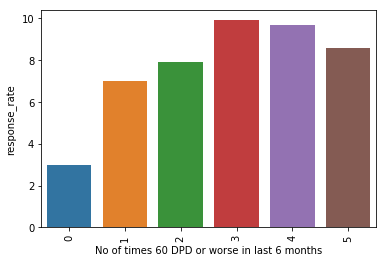

In [82]:
ax = sns.barplot(x='No of times 60 DPD or worse in last 6 months', y='response_rate', data=agg_60dpd)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Three times 60 DPD have been worse in the last 6 months

#### No of times 30 DPD or worse in last 6 months

In [83]:
master_eda['No of times 30 DPD or worse in last 6 months'].value_counts()

0    48859
1     9469
2     5876
3     2816
4     1033
5      375
6       95
7       15
Name: No of times 30 DPD or worse in last 6 months, dtype: int64

In [84]:
No_of_prospect = master_eda.groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of times 30 DPD or worse in last 6 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_30dpd = No_of_prospect.merge(count_prospects, on='No of times 30 DPD or worse in last 6 months')
agg_30dpd['response_rate'] = 100*(agg_30dpd['count_prospects']/agg_30dpd['No.of_prospect']).round(3)

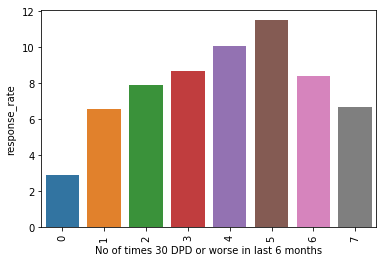

In [85]:
ax = sns.barplot(x='No of times 30 DPD or worse in last 6 months', y='response_rate', data=agg_30dpd)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Five times 30 DPD has been worse in last 6 months

#### No of times 90 DPD or worse in last 12 months

In [86]:
master_eda['No of times 90 DPD or worse in last 12 months'].value_counts()

0    49250
1    11624
2     6133
3     1234
4      262
5       35
Name: No of times 90 DPD or worse in last 12 months, dtype: int64

In [87]:
No_of_prospect = master_eda.groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master['Performance Tag']==1].groupby('No of times 90 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_90dpd_12 = No_of_prospect.merge(count_prospects, on='No of times 90 DPD or worse in last 12 months')
agg_90dpd_12['response_rate'] = 100*(agg_90dpd_12['count_prospects']/agg_90dpd_12['No.of_prospect']).round(3)

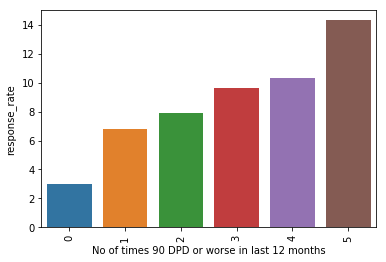

In [88]:
ax = sns.barplot(x='No of times 90 DPD or worse in last 12 months', y='response_rate', data=agg_90dpd_12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In the last 12 months, 90 dpd has been worse for 5 times

#### No of times 60 DPD or worse in last 12 months

In [89]:
master_eda['No of times 60 DPD or worse in last 12 months'].value_counts()

0    44735
1    12680
2     6400
3     3181
4     1036
5      389
6      110
7        7
Name: No of times 60 DPD or worse in last 12 months, dtype: int64

In [90]:
No_of_prospect = master_eda.groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of times 60 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_60dpd_12 = No_of_prospect.merge(count_prospects, on='No of times 60 DPD or worse in last 12 months')
agg_60dpd_12['response_rate'] = 100*(agg_60dpd_12['count_prospects']/agg_60dpd_12['No.of_prospect']).round(3)

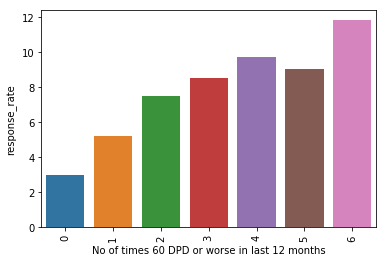

In [91]:
ax = sns.barplot(x='No of times 60 DPD or worse in last 12 months', y='response_rate', data=agg_60dpd_12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In the last 12 months, 60 dpd has been worse for 6 times

#### No of times 30 DPD or worse in last 12 months

In [92]:
master_eda['No of times 30 DPD or worse in last 12 months'].value_counts()

0    43728
1    11344
2     6094
3     4122
4     1912
5      842
6      366
7      106
8       23
9        1
Name: No of times 30 DPD or worse in last 12 months, dtype: int64

In [93]:
No_of_prospect = master_eda.groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of times 30 DPD or worse in last 12 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_30dpd_12 = No_of_prospect.merge(count_prospects, on='No of times 30 DPD or worse in last 12 months')
agg_30dpd_12['response_rate'] = 100*(agg_30dpd_12['count_prospects']/agg_30dpd_12['No.of_prospect']).round(3)

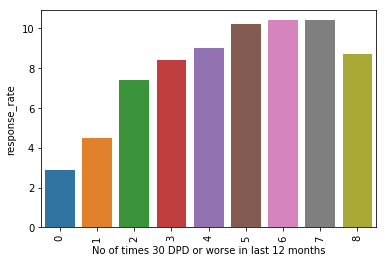

In [94]:
ax = sns.barplot(x='No of times 30 DPD or worse in last 12 months', y='response_rate', data=agg_30dpd_12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In the last 12 months, 30 dpd has been worse for 6-7 times

#### Avgas CC Utilization in last 12 months

In [95]:
master_eda['Avgas CC Utilization in last 12 months'].value_counts()

9.0      3462
8.0      3461
7.0      3358
10.0     3204
113.0    3119
6.0      2946
11.0     2887
12.0     2551
5.0      2478
13.0     2216
4.0      1948
14.0     1797
3.0      1594
15.0     1487
16.0     1205
2.0      1077
17.0     1069
18.0      924
19.0      785
20.0      685
21.0      677
1.0       644
23.0      587
22.0      582
24.0      550
46.0      530
25.0      525
41.0      525
48.0      500
43.0      497
         ... 
82.0      122
84.0      116
86.0      114
85.0      108
87.0       98
88.0       90
90.0       86
93.0       75
89.0       74
91.0       71
92.0       70
98.0       57
103.0      54
95.0       50
94.0       48
96.0       47
106.0      45
104.0      45
102.0      44
108.0      43
105.0      42
100.0      41
112.0      41
101.0      40
107.0      39
97.0       38
99.0       36
111.0      36
109.0      33
110.0      30
Name: Avgas CC Utilization in last 12 months, Length: 114, dtype: int64

In [96]:
master_eda

,Application ID,Age,Gender,Marital Status,No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,...,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,age_bins,income_bins,residence_bins,company_bins
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,...,0,0,1.0,2999395.0,4,0,"(40.0, 50.0]","(30.0, 40.0]","(101.0, 113.0]","(53.0, 65.0]"
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,...,0,0,0.0,3078.0,5,0,"(30.0, 40.0]","(50.0, 60.0]","(101.0, 113.0]","(41.0, 53.0]"
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,...,0,0,1.0,3004972.0,2,0,"(30.0, 40.0]","(40.0, 50.0]","(101.0, 113.0]","(41.0, 53.0]"
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,...,0,0,1.0,3355373.0,4,1,"(40.0, 50.0]","(50.0, 60.0]","(89.0, 101.0]","(41.0, 53.0]"
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,...,0,0,1.0,3014283.0,4,0,"(30.0, 40.0]","(40.0, 50.0]","(101.0, 113.0]","(41.0, 53.0]"
6,532217204,42,M,Married,2.0,55.0,Professional,SAL,Rented,104,...,0,0,1.0,3005535.0,4,0,"(40.0, 50.0]","(50.0, 60.0]","(101.0, 113.0]","(29.0, 41.0]"
7,74788849,34,M,Married,2.0,49.0,Masters,SE_PROF,Rented,108,...,0,0,1.0,3004790.0,3,0,"(30.0, 40.0]","(40.0, 50.0]","(101.0, 113.0]","(29.0, 41.0]"
8,782743811,30,M,Married,3.0,48.0,Phd,SAL,Rented,115,...,0,0,1.0,3007428.0,2,0,"(20.0, 30.0]","(40.0, 50.0]","(113.0, 125.0]","(53.0, 65.0]"
9,96964957,22,M,Single,1.0,38.0,Bachelor,SE_PROF,Rented,111,...,0,0,0.0,170860.0,1,1,"(20.0, 30.0]","(30.0, 40.0]","(101.0, 113.0]","(53.0, 65.0]"
10,547975524,37,M,Married,1.0,43.0,Bachelor,SAL,Rented,112,...,0,0,0.0,1650.0,2,0,"(30.0, 40.0]","(40.0, 50.0]","(101.0, 113.0]","(41.0, 53.0]"


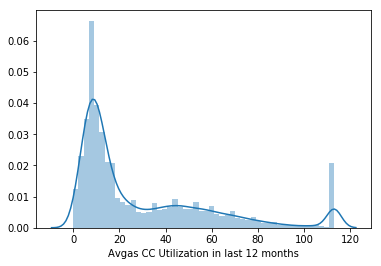

In [97]:

sns.distplot(master_eda['Avgas CC Utilization in last 12 months'])
plt.show()

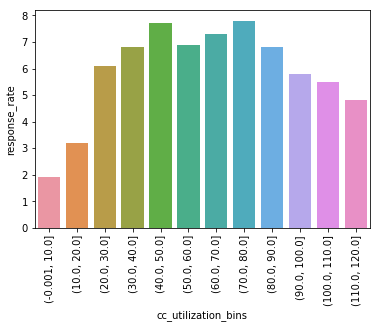

In [98]:
#Let us create bins for Avgas CC Utilization in last 12 months
bins = np.arange(0,master_eda['Avgas CC Utilization in last 12 months'].max() + 10, 10)
master_eda['cc_utilization_bins'] = pd.cut(master_eda['Avgas CC Utilization in last 12 months'], bins, include_lowest=True)

No_of_prospect = master_eda.groupby('cc_utilization_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('cc_utilization_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_cc_util = No_of_prospect.merge(count_prospects, on='cc_utilization_bins')
agg_cc_util['response_rate'] = 100*(agg_cc_util['count_prospects']/agg_cc_util['No.of_prospect']).round(3)

ax = sns.barplot(x='cc_utilization_bins', y='response_rate', data=agg_cc_util)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### No of trades opened in last 6 months 

In [99]:
master_eda['No of trades opened in last 6 months'].value_counts()

1.0     19978
2.0     12076
0.0     11127
3.0      9376
4.0      6273
5.0      3647
6.0      2330
7.0      1648
8.0      1153
9.0       616
10.0      238
11.0       65
12.0       11
Name: No of trades opened in last 6 months, dtype: int64

In [100]:
No_of_prospect = master_eda.groupby('No of trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_trade_6 = No_of_prospect.merge(count_prospects, on='No of trades opened in last 6 months')
agg_trade_6['response_rate'] = 100*(agg_trade_6['count_prospects']/agg_trade_6['No.of_prospect']).round(3)

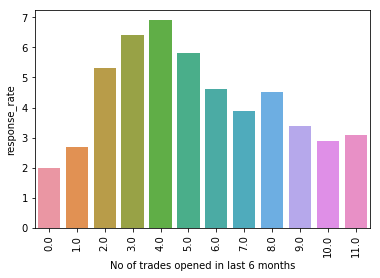

In [101]:
ax = sns.barplot(x='No of trades opened in last 6 months', y='response_rate', data=agg_trade_6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### No of trades opened in last 12 months

In [102]:
master_eda['No of trades opened in last 12 months'].value_counts()

1     11286
2      9253
4      4837
3      4659
5      4533
6      4188
7      4074
0      3938
8      3790
9      3363
10     2802
11     2170
12     1696
13     1364
14     1113
15     1066
16      991
17      860
18      735
19      612
20      433
21      308
22      218
23      120
24       72
25       34
26       11
27        9
28        3
Name: No of trades opened in last 12 months, dtype: int64

In [103]:
No_of_prospect = master_eda.groupby('No of trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_trade_12 = No_of_prospect.merge(count_prospects, on='No of trades opened in last 12 months')
agg_trade_12['response_rate'] = 100*(agg_trade_12['count_prospects']/agg_trade_12['No.of_prospect']).round(3)

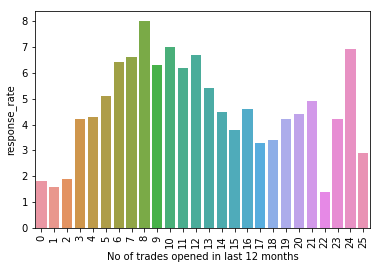

In [104]:
ax = sns.barplot(x='No of trades opened in last 12 months', y='response_rate', data=agg_trade_12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

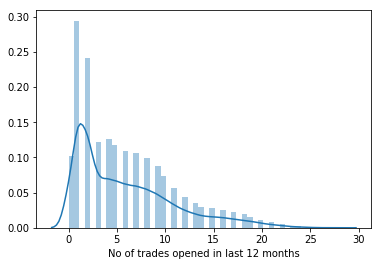

In [105]:
sns.distplot(master_eda['No of trades opened in last 12 months'])
plt.show()

#### No of PL trades opened in last 6 months

In [106]:
master_eda['No of PL trades opened in last 6 months'].value_counts()

0    29883
1    13502
2    12521
3     7919
4     3331
5     1087
6      295
Name: No of PL trades opened in last 6 months, dtype: int64

In [107]:
No_of_prospect = master_eda.groupby('No of PL trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of PL trades opened in last 6 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_pltrade_6 = No_of_prospect.merge(count_prospects, on='No of PL trades opened in last 6 months')
agg_pltrade_6['response_rate'] = 100*(agg_pltrade_6['count_prospects']/agg_pltrade_6['No.of_prospect']).round(3)

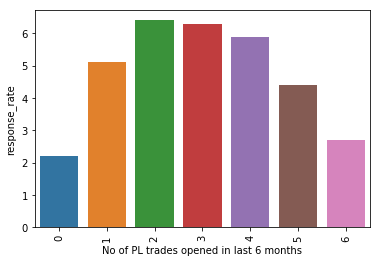

In [108]:
ax = sns.barplot(x='No of PL trades opened in last 6 months', y='response_rate', data=agg_pltrade_6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### No of PL trades opened in last 12 months

In [109]:
master_eda['No of PL trades opened in last 12 months'].value_counts()

0     24643
3      8103
4      7873
2      6810
1      6623
5      6166
6      4004
7      2217
8      1171
9       599
10      253
11       66
12       10
Name: No of PL trades opened in last 12 months, dtype: int64

In [110]:
No_of_prospect = master_eda.groupby('No of PL trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of PL trades opened in last 12 months')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_pltrade_12 = No_of_prospect.merge(count_prospects, on='No of PL trades opened in last 12 months')
agg_pltrade_12['response_rate'] = 100*(agg_pltrade_12['count_prospects']/agg_pltrade_12['No.of_prospect']).round(3)

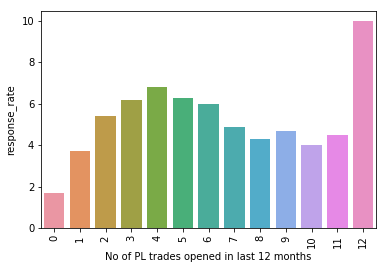

In [111]:
ax = sns.barplot(x='No of PL trades opened in last 12 months', y='response_rate', data=agg_pltrade_12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### No of Inquiries in last 6 months (excluding home & auto loans)

In [112]:
master_eda['No of Inquiries in last 6 months (excluding home & auto loans)'].value_counts()

0     23930
1     13099
2     12779
3      7225
4      4233
5      3015
6      1745
7      1145
8       834
9       425
10      108
Name: No of Inquiries in last 6 months (excluding home & auto loans), dtype: int64

In [113]:
No_of_prospect = master_eda.groupby('No of Inquiries in last 6 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of Inquiries in last 6 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_inquiries_6 = No_of_prospect.merge(count_prospects, on='No of Inquiries in last 6 months (excluding home & auto loans)')
agg_inquiries_6['response_rate'] = 100*(agg_inquiries_6['count_prospects']/agg_inquiries_6['No.of_prospect']).round(3)

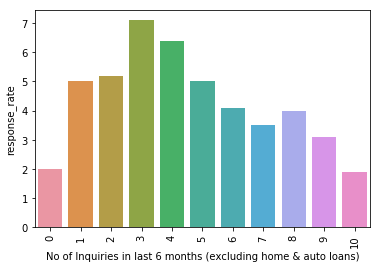

In [114]:
ax = sns.barplot(x='No of Inquiries in last 6 months (excluding home & auto loans)', y='response_rate', data=agg_inquiries_6)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

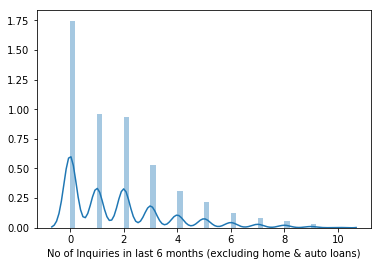

In [115]:
sns.distplot(master_eda['No of Inquiries in last 6 months (excluding home & auto loans)'])
plt.show()

#### No of Inquiries in last 12 months (excluding home & auto loans)

In [116]:
master_eda['No of Inquiries in last 12 months (excluding home & auto loans)'].value_counts()

0     19784
3      8926
2      7863
4      7084
5      4900
6      3601
1      3560
7      2981
8      2339
9      1777
10     1507
11     1228
12      933
13      789
14      549
15      360
16      212
17       97
18       40
19        6
20        2
Name: No of Inquiries in last 12 months (excluding home & auto loans), dtype: int64

In [117]:
No_of_prospect = master_eda.groupby('No of Inquiries in last 12 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('No of Inquiries in last 12 months (excluding home & auto loans)')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_inquiries_12 = No_of_prospect.merge(count_prospects, on='No of Inquiries in last 12 months (excluding home & auto loans)')
agg_inquiries_12['response_rate'] = 100*(agg_inquiries_12['count_prospects']/agg_inquiries_12['No.of_prospect']).round(3)

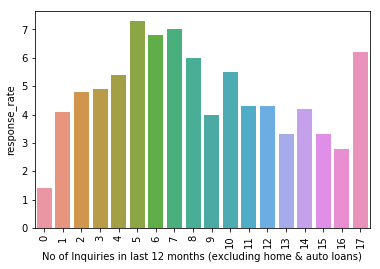

In [118]:
ax = sns.barplot(x='No of Inquiries in last 12 months (excluding home & auto loans)', y='response_rate', data=agg_inquiries_12)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Presence of open home loan

In [119]:
master_eda['Presence of open home loan'].value_counts()

0.0    50588
1.0    17950
Name: Presence of open home loan, dtype: int64

In [120]:
No_of_prospect = master_eda.groupby('Presence of open home loan')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master['Performance Tag']==1].groupby('Presence of open home loan')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_homeloan = No_of_prospect.merge(count_prospects, on='Presence of open home loan')
agg_homeloan['response_rate'] = 100*(agg_homeloan['count_prospects']/agg_homeloan['No.of_prospect']).round(3)

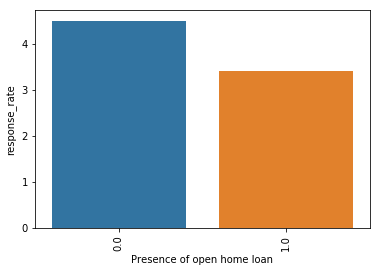

In [121]:
ax = sns.barplot(x='Presence of open home loan', y='response_rate', data=agg_homeloan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Presence of open auto loan

In [122]:
master_eda['Presence of open auto loan'].value_counts()

0    62643
1     5895
Name: Presence of open auto loan, dtype: int64

In [123]:
No_of_prospect = master_eda.groupby('Presence of open auto loan')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('Presence of open auto loan')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_autoloan = No_of_prospect.merge(count_prospects, on='Presence of open auto loan')
agg_autoloan['response_rate'] = 100*(agg_autoloan['count_prospects']/agg_autoloan['No.of_prospect']).round(3)

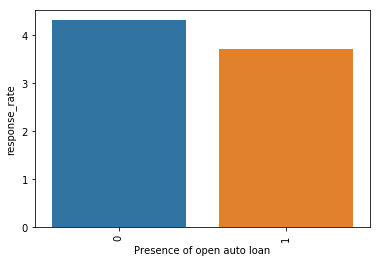

In [124]:
ax = sns.barplot(x='Presence of open auto loan', y='response_rate', data=agg_autoloan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

#### Outstanding Balance

In [125]:
master_eda['Outstanding Balance'].value_counts()

0.0          93
2577.0        6
3528.0        6
4295.0        6
2595.0        6
2773.0        6
9314.0        5
713.0         5
1494.0        5
5571.0        5
1228.0        5
2918.0        5
1302.0        5
11005.0       5
3305.0        5
1528.0        5
5.0           5
4569.0        5
4017.0        5
5729.0        5
77.0          5
7714.0        5
716.0         5
5327.0        4
15387.0       4
2876.0        4
3170.0        4
1693.0        4
3138.0        4
4606.0        4
             ..
2963814.0     1
2963999.0     1
872052.0      1
2963984.0     1
2963983.0     1
3796.0        1
6813.0        1
2963964.0     1
2963952.0     1
740987.0      1
2963941.0     1
2963939.0     1
620729.0      1
609910.0      1
843396.0      1
2963914.0     1
2963818.0     1
2963906.0     1
2963896.0     1
2963889.0     1
2963885.0     1
2963876.0     1
2963875.0     1
1026778.0     1
2963859.0     1
2963855.0     1
2963845.0     1
2963840.0     1
2963828.0     1
3449498.0     1
Name: Outstanding Balanc

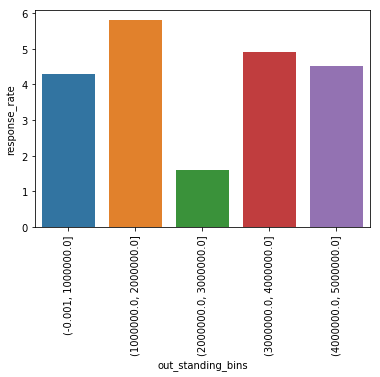

In [126]:
#Let us create bins for Outstanding Balance
bins = np.arange(0,master_eda['Outstanding Balance'].max() + 100000, 1000000)
master_eda['out_standing_bins'] = pd.cut(master_eda['Outstanding Balance'], bins, include_lowest=True)

No_of_prospect = master_eda.groupby('out_standing_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('out_standing_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_out_stand = No_of_prospect.merge(count_prospects, on='out_standing_bins')
agg_out_stand['response_rate'] = 100*(agg_out_stand['count_prospects']/agg_out_stand['No.of_prospect']).round(3)

ax = sns.barplot(x='out_standing_bins', y='response_rate', data=agg_out_stand)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

The maximum outstanding balance is in the range of 10 lakhs to 20 lakhs

#### Total No of Trades

In [127]:
master_eda['Total No of Trades'].value_counts()

3     8549
4     7439
2     6711
5     5686
6     4948
7     4815
8     4509
9     3894
10    3218
1     2902
11    2491
12    1820
13    1146
25     730
14     711
23     697
22     693
21     671
24     668
26     638
20     611
27     578
19     536
28     479
15     473
18     442
16     431
29     419
17     394
30     339
31     272
32     198
33     149
34     103
35      70
36      48
37      29
38      10
39       9
40       7
43       2
41       1
42       1
44       1
Name: Total No of Trades, dtype: int64

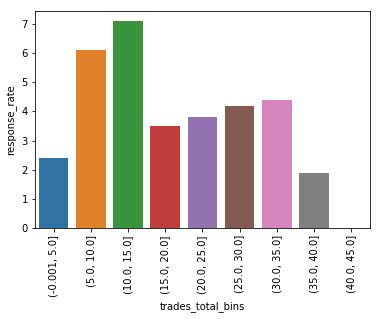

In [128]:
#Let us create bins for Total No of Trades
bins = np.arange(0,master_eda['Total No of Trades'].max() + 5, 5)
master_eda['trades_total_bins'] = pd.cut(master_eda['Total No of Trades'], bins, include_lowest=True)

No_of_prospect = master_eda.groupby('trades_total_bins')['Performance Tag'].count().reset_index(name = 'No.of_prospect')
count_prospects = master_eda[master_eda['Performance Tag']==1].groupby('trades_total_bins')['Performance Tag'].count().reset_index(name = 'count_prospects')
agg_trade_total = No_of_prospect.merge(count_prospects, on='trades_total_bins')
agg_trade_total['response_rate'] = 100*(agg_trade_total['count_prospects']/agg_trade_total['No.of_prospect']).round(3)

ax = sns.barplot(x='trades_total_bins', y='response_rate', data=agg_trade_total)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

Maximum number of trades is between 10 and 15.

In [129]:
# creating dummy variables for categorical variables
# subset all categorical variables
master_categorical = master.select_dtypes(include=['object'])
master_categorical.head()

,Gender,Marital Status,Education,Profession,Type of residence
0,F,Married,Bachelor,SAL,Rented
1,M,Married,Professional,SE_PROF,Rented
2,M,Single,Bachelor,SE_PROF,Rented
3,M,Married,Bachelor,SE,Rented
4,F,Married,Professional,SAL,Rented


In [130]:
# convert into dummies
master_dummies = pd.get_dummies(master_categorical, drop_first=True)
master_dummies.head()

,Gender_M,Marital Status_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,0,1,0,1,0,0,0,1
2,1,1,0,0,0,0,0,1,0,0,0,1
3,1,0,0,0,0,0,1,0,0,0,0,1
4,0,0,0,0,0,1,0,0,0,0,0,1


In [131]:
# drop categorical variables 
master = master.drop(list(master_categorical.columns), axis=1)

In [132]:
# concat dummy variables with X
master = pd.concat([master, master_dummies], axis=1)

In [133]:
# Final Dataset
master.head()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,954457215,48,2.0,40.0,113,56,0.0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,432830445,31,4.0,55.0,112,46,0.0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
2,941387308,32,2.0,46.0,104,49,0.0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,392161677,43,1.0,53.0,94,53,0.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
4,182011211,35,5.0,44.0,112,43,0.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [134]:
# Data with Application ID in case we need to join back
app_id = master['Application ID']

In [135]:
master = master.drop(columns = ['Application ID'])

In [136]:
master.isnull().sum()

Age                                                                0
No of dependents                                                   0
Income                                                             0
No of months in current residence                                  0
No of months in current company                                    0
Performance Tag                                                    0
No of times 90 DPD or worse in last 6 months                       0
No of times 60 DPD or worse in last 6 months                       0
No of times 30 DPD or worse in last 6 months                       0
No of times 90 DPD or worse in last 12 months                      0
No of times 60 DPD or worse in last 12 months                      0
No of times 30 DPD or worse in last 12 months                      0
Avgas CC Utilization in last 12 months                             0
No of trades opened in last 6 months                               0
No of trades opened in last 12 mon

In [137]:
# creating dummy variables for rejected data categorical variables
# subset all categorical variables
master_reject_categorical = master_rejected.select_dtypes(include=['object'])
master_reject_categorical.head()

,Gender,Marital Status,Education,Profession,Type of residence
69600,M,Single,Bachelor,SAL,Rented
69601,F,Married,Masters,SE,Rented
69602,M,Married,Professional,SE,Rented
69603,M,Married,Masters,SAL,Rented
69604,F,Married,Phd,SAL,Rented


In [138]:
# convert into dummies
master_reject_dummies = pd.get_dummies(master_reject_categorical, drop_first=True)
master_reject_dummies = master_reject_dummies.reindex(columns = master_reject_dummies.columns, fill_value=0)
master_reject_dummies.head()

,Gender_M,Marital Status_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
69600,1,1,0,0,0,0,0,0,0,0,0,1
69601,0,0,1,0,0,0,1,0,0,0,0,1
69602,1,0,0,0,0,1,1,0,0,0,0,1
69603,1,0,1,0,0,0,0,0,0,0,0,1
69604,0,0,0,0,1,0,0,0,0,0,0,1


In [139]:
# drop categorical variables 
master_rejected = master_rejected.drop(list(master_reject_categorical.columns), axis=1)

In [140]:
# concat dummy variables with X
master_rejected = pd.concat([master_rejected, master_reject_dummies], axis=1)

In [141]:
# Final Dataset
master_rejected.head()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
69600,906908303,35,1.0,6.0,22,18,NaN,0,0,2,...,0,0,0,0,0,0,0,0,0,1
69601,10990583,47,4.0,12.0,122,25,NaN,1,1,1,...,1,0,0,0,1,0,0,0,0,1
69602,589678446,46,3.0,7.0,10,31,NaN,3,4,5,...,0,0,0,1,1,0,0,0,0,1
69603,809411322,41,3.0,18.0,6,47,NaN,1,3,4,...,1,0,0,0,0,0,0,0,0,1
69604,150246616,42,4.0,17.0,8,49,NaN,2,2,4,...,0,0,1,0,0,0,0,0,0,1


In [142]:
master_rejected = master_rejected.drop(columns = ['Application ID'])
master_rejected.isnull().sum()

Age                                                                   0
No of dependents                                                      0
Income                                                                0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag                                                    1425
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                               35
No of trades opened in last 6 months                            

In [143]:
master_rejected = master_rejected.dropna(subset = ['Avgas CC Utilization in last 12 months'])
master_rejected.isnull().sum()

Age                                                                   0
No of dependents                                                      0
Income                                                                0
No of months in current residence                                     0
No of months in current company                                       0
Performance Tag                                                    1390
No of times 90 DPD or worse in last 6 months                          0
No of times 60 DPD or worse in last 6 months                          0
No of times 30 DPD or worse in last 6 months                          0
No of times 90 DPD or worse in last 12 months                         0
No of times 60 DPD or worse in last 12 months                         0
No of times 30 DPD or worse in last 12 months                         0
Avgas CC Utilization in last 12 months                                0
No of trades opened in last 6 months                            

###  Weight of evidence (WOE), Information Value(IV)

In [144]:
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [145]:
master_woe = master

In [146]:
final_iv, IV = data_vars(master_woe,master_woe['Performance Tag'])

In [147]:
final_iv

,VAR_NAME,MIN_VALUE,MAX_VALUE,COUNT,EVENT,EVENT_RATE,NONEVENT,NON_EVENT_RATE,DIST_EVENT,DIST_NON_EVENT,WOE,IV
0,Age,19.0,40.0,24067,1053.0,0.043753,23014.0,0.956247,0.364234,0.350572,0.038230,8.595180e-04
1,Age,41.0,50.0,22465,936.0,0.041665,21529.0,0.958335,0.323763,0.327951,-0.012851,8.595180e-04
2,Age,51.0,65.0,22006,902.0,0.040989,21104.0,0.959011,0.312003,0.321477,-0.029914,8.595180e-04
3,No of dependents,1.0,3.0,45103,1916.0,0.042481,43187.0,0.957519,0.662746,0.657867,0.007390,1.061456e-04
4,No of dependents,4.0,5.0,23435,975.0,0.041604,22460.0,0.958396,0.337254,0.342133,-0.014364,1.061456e-04
5,Income,0.0,10.0,12539,696.0,0.055507,11843.0,0.944493,0.240747,0.180404,0.288547,3.761942e-02
6,Income,11.0,18.0,10422,469.0,0.045001,9953.0,0.954999,0.162228,0.151614,0.067663,3.761942e-02
7,Income,19.0,27.0,12082,534.0,0.044198,11548.0,0.955802,0.184711,0.175911,0.048818,3.761942e-02
8,Income,28.0,35.0,10818,442.0,0.040858,10376.0,0.959142,0.152888,0.158057,-0.033251,3.761942e-02
9,Income,36.0,44.0,11697,391.0,0.033427,11306.0,0.966573,0.135247,0.172224,-0.241692,3.761942e-02


In [148]:
IV.sort_values('IV').round(decimals=4)

,VAR_NAME,IV
25,Performance Tag,0.0000
2,Education_Masters,0.0000
33,Type of residence_Owned,0.0000
34,Type of residence_Rented,0.0000
4,Education_Phd,0.0000
29,Profession_SE_PROF,0.0001
5,Education_Professional,0.0001
8,Marital Status_Single,0.0001
13,No of dependents,0.0001
31,Type of residence_Living with Parents,0.0002


In [149]:
IV.to_csv('test.csv')

#### Apply WOE values to dataframe columns

In [150]:
transform_vars_list = master_woe.columns.difference(['Performance Tag'])
transform_prefix = ''

In [151]:
transform_vars_list

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education_Masters',
       'Education_Others', 'Education_Phd', 'Education_Professional',
       'Gender_M', 'Income', 'Marital Status_Single',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
 

In [152]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            master_woe[transform_prefix + var] = master_woe[var].apply(lambda x: eval(replace_cmd))
        except:
            master_woe[transform_prefix + var] = master_woe[var].apply(lambda x: eval(replace_cmd1))

In [153]:
master_woe.columns

Index(['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Gender_M',
  

In [154]:
# Dataset with woe values 
master_woe.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,-0.012851,0.007390,-0.241692,0.209176,-0.123545,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481
1,0.038230,-0.014364,-0.264577,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,-0.014025,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
2,0.038230,0.007390,-0.264577,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
3,-0.012851,0.007390,-0.264577,0.209176,-0.123545,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,0.087476,0.004747,-0.002282,0.001167,0.001082,-0.002481
4,0.038230,-0.014364,-0.241692,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,-0.014025,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481


### Data Preparation

In [155]:
#We will have two datasets for modelling 

#1 woe demodata cleaned without application id
demographic_woe = master_woe.drop(['No of times 90 DPD or worse in last 6 months','No of times 60 DPD or worse in last 6 months','No of times 30 DPD or worse in last 6 months','No of times 90 DPD or worse in last 12 months','No of times 60 DPD or worse in last 12 months','No of times 30 DPD or worse in last 12 months','Avgas CC Utilization in last 12 months','No of trades opened in last 6 months','No of trades opened in last 12 months','No of PL trades opened in last 6 months','No of PL trades opened in last 12 months','No of Inquiries in last 6 months (excluding home & auto loans)','No of Inquiries in last 12 months (excluding home & auto loans)','Presence of open home loan','Outstanding Balance','Total No of Trades','Presence of open auto loan'], axis = 1)


#2 merged woe data cleaned without application_id
woe_data = master_woe

In [156]:
demographic_woe.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,Gender_M,Marital Status_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,-0.012851,0.007390,-0.241692,0.209176,-0.123545,0.0,0.030032,-0.004300,-0.000206,-0.00117,0.001208,0.007463,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481
1,0.038230,-0.014364,-0.264577,0.209176,-0.076501,0.0,-0.009461,-0.004300,-0.000206,-0.00117,0.001208,-0.014025,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
2,0.038230,0.007390,-0.264577,0.209176,-0.076501,0.0,-0.009461,0.024496,-0.000206,-0.00117,0.001208,0.007463,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
3,-0.012851,0.007390,-0.264577,0.209176,-0.123545,0.0,-0.009461,-0.004300,-0.000206,-0.00117,0.001208,0.007463,0.087476,0.004747,-0.002282,0.001167,0.001082,-0.002481
4,0.038230,-0.014364,-0.241692,0.209176,-0.076501,0.0,0.030032,-0.004300,-0.000206,-0.00117,0.001208,-0.014025,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481


In [157]:
woe_data.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,-0.012851,0.007390,-0.241692,0.209176,-0.123545,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481
1,0.038230,-0.014364,-0.264577,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,-0.014025,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
2,0.038230,0.007390,-0.264577,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
3,-0.012851,0.007390,-0.264577,0.209176,-0.123545,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,0.087476,0.004747,-0.002282,0.001167,0.001082,-0.002481
4,0.038230,-0.014364,-0.241692,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,-0.014025,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481


In [158]:
woe_data.columns

Index(['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 6 months',
       'No of trades opened in last 12 months',
       'No of PL trades opened in last 6 months',
       'No of PL trades opened in last 12 months',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan', 'Outstanding Balance',
       'Total No of Trades', 'Presence of open auto loan', 'Gender_M',
  

In [159]:
demographic_woe.columns

Index(['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag', 'Gender_M', 'Marital Status_Single',
       'Education_Masters', 'Education_Others', 'Education_Phd',
       'Education_Professional', 'Profession_SE', 'Profession_SE_PROF',
       'Type of residence_Living with Parents', 'Type of residence_Others',
       'Type of residence_Owned', 'Type of residence_Rented'],
      dtype='object')

In [160]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

#### Splitting Demographic  WOE data into train and test

In [161]:
# Putting feature variable to X
X = demographic_woe.drop(['Performance Tag'],axis=1)
# Putting response variable to y
y = demographic_woe['Performance Tag']

In [162]:
# Splitting the data into train and test
X_train_demo_woe1, X_test_demo_woe1, y_train_demo_woe1, y_test_demo_woe1 = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [163]:
X_train_demo_woe1.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Gender_M,Marital Status_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
14053,-0.029914,0.00739,-0.264577,-0.256205,-0.123545,-0.009461,-0.0043,0.000406,-0.00117,0.001208,0.007463,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481
34465,-0.029914,0.00739,-0.241692,-0.256205,-0.076501,0.030032,-0.0043,0.000406,-0.00117,0.001208,0.007463,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481
46226,0.038230,0.00739,0.067663,0.209176,-0.123545,-0.009461,-0.0043,-0.000206,-0.00117,0.001208,0.007463,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
47796,-0.029914,0.00739,-0.264577,0.209176,0.168583,-0.009461,-0.0043,0.000406,-0.00117,0.001208,0.007463,-0.022932,0.004747,-0.002282,0.001167,-0.004330,0.007354
21017,0.038230,0.00739,-0.033251,-0.256205,0.168583,-0.009461,-0.0043,0.000406,-0.00117,0.001208,0.007463,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481


In [164]:
X_train_demo_woe1.columns

Index(['Age', 'No of dependents', 'Income',
       'No of months in current residence', 'No of months in current company',
       'Gender_M', 'Marital Status_Single', 'Education_Masters',
       'Education_Others', 'Education_Phd', 'Education_Professional',
       'Profession_SE', 'Profession_SE_PROF',
       'Type of residence_Living with Parents', 'Type of residence_Others',
       'Type of residence_Owned', 'Type of residence_Rented'],
      dtype='object')

In [165]:
import statsmodels.api as sm

### Modelling
### Model 1: Logistic Regression- Demographic WOE

In [166]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [167]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.metrics import sensitivity_specificity_support
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [168]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train_demo_woe1, y_train_demo_woe1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [169]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train_demo_woe1)
logm1 = sm.GLM(y_train_demo_woe1,(sm.add_constant(X_train_demo_woe1)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                47976
Model:                            GLM   Df Residuals:                    47958
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8170.6
Date:                Mon, 23 Dec 2019   Deviance:                       16341.
Time:                        18:56:24   Pearson chi2:                 4.81e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -3.1441      0.023   -135.060      0.000      -3.190      -3.099
Age                                       0.3583      0.827      0.433      0.665      -1.263       1.979
No of dependents                          0.5221      2.283      0.229      0.819      -3.953       4.997
Income                                    0.8630      0.120      7.195      0.000       0.628       1.098
No of months in current residence         0.9160      0.102      8.946      0.000       0.715       1.117
No of months in current company           1.3312      0.199      6.699      0.000       0.942       1.721
Gender_M                                 -0.0653      1.370     -0.048      0.962      -2.750       2.619
Marital Status_Single                     0.6028      2.277      0.265      0.791      -3.860       5.065
Education_Masters                       -72.0705     97.729     -0.737      0.461    -263.616     119.475
Education_Others                          1.0142      0.784      1.294      0.196      -0.522       2.550
Education_Phd                             3.6622      5.361      0.683      0.495      -6.846      14.170
Education_Professional                    4.0819      2.785      1.465      0.143      -1.377       9.541
Profession_SE                             1.5474      0.527      2.934      0.003       0.514       2.581
Profession_SE_PROF                       -3.0339      2.785     -1.089      0.276      -8.492       2.424
Type of residence_Living with Parents    -1.5433      2.251     -0.686      0.493      -5.955       2.868
Type of residence_Others                  0.8123      0.924      0.879      0.379      -0.999       2.624
Type of residence_Owned                  49.7486     27.437      1.813      0.070      -4.027     103.524
Type of residence_Rented                 26.3954     14.418      1.831      0.067      -1.863      54.654
=========================================================================================================
"""

In [170]:
pca = PCA()
pca.fit(X_train_demo_woe1)
churn_pca = pca.fit_transform(X_train_demo_woe1)

In [171]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      51.34
1      84.14
2      95.45
3      97.24
4      98.03
5      98.76
6      99.20
7      99.45
8      99.62
9      99.72
10     99.81
11     99.90
12     99.96
13     99.98
14    100.00
15    100.00
16    100.00
dtype: float64


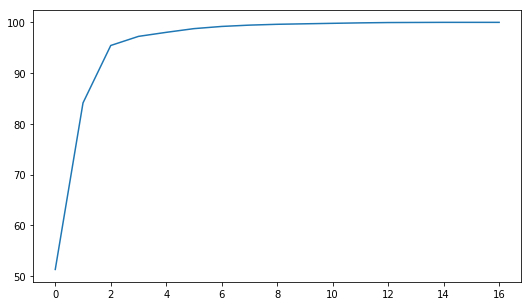

In [172]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [173]:
# create pipeline
PCA_VARS = 11
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [174]:
# fit model
pipeline.fit(X_train_demo_woe1, y_train_demo_woe1)

# check score on train data
pipeline.score(X_train_demo_woe1, y_train_demo_woe1)

0.5710563615140903

In [175]:
# predict churn on test data
y_pred = pipeline.predict(X_test_demo_woe1)

# create onfusion matrix
cm = confusion_matrix(y_test_demo_woe1, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_demo_woe1, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test_demo_woe1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test_demo_woe1, y_pred_prob),2))

[[11112  8549]
 [  405   496]]
Sensitivity: 	0.55
Specificity: 	0.57
AUC:    	 0.57


In [176]:
# class imbalance
y_train_demo_woe1.value_counts()/y_train_demo_woe1.shape

0.0    0.958521
1.0    0.041479
Name: Performance Tag, dtype: float64

In [177]:
#Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train_demo_woe1, y_train_demo_woe1.ravel())

In [178]:
# PCA
pca = PCA()

# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [8,9,10,11], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [179]:
model.fit(X_train_res, y_train_res.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           int...
                                       

In [180]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.629039,0.033234,0.018711,0.003338,0.1,l1,8,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.592273,0.589253,0.601150,0.604625,0.593702,0.596200,0.005751,64
1,0.633494,0.033156,0.019345,0.001003,0.1,l1,9,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.592273,0.589254,0.601150,0.604625,0.593702,0.596201,0.005751,63
2,0.614955,0.012571,0.020126,0.000005,0.1,l1,10,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.592375,0.589464,0.601325,0.604924,0.593716,0.596361,0.005804,61
3,0.681256,0.052041,0.020578,0.005145,0.1,l1,11,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.592375,0.589464,0.601325,0.604924,0.593716,0.596361,0.005804,62
4,0.770631,0.050729,0.016520,0.003668,0.1,l2,8,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.593031,0.589415,0.601282,0.604863,0.594256,0.596569,0.005658,60
5,0.761580,0.021918,0.020181,0.000065,0.1,l2,9,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.593110,0.589361,0.601284,0.604911,0.594307,0.596594,0.005672,59
6,0.796591,0.012624,0.018128,0.003122,0.1,l2,10,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.593357,0.589878,0.601589,0.605241,0.594678,0.596948,0.005628,58
7,0.855504,0.048508,0.020145,0.000007,0.1,l2,11,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.593473,0.589901,0.601626,0.605242,0.594817,0.597012,0.005602,57
8,0.619738,0.013540,0.020173,0.005151,0.5,l1,8,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.593904,0.590147,0.602237,0.605489,0.594768,0.597309,0.005666,35
9,0.627216,0.012622,0.021760,0.003231,0.5,l1,9,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",0.593985,0.590102,0.602151,0.605489,0.594812,0.597308,0.005649,37


In [181]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.5983315454877002
Best hyperparameters:  {'logistic__C': 1, 'logistic__penalty': 'l2', 'pca__n_components': 11}


In [182]:
from sklearn.metrics import classification_report
print(classification_report(y_test_demo_woe1,y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.57      0.71     19661
         1.0       0.05      0.55      0.10       901

    accuracy                           0.56     20562
   macro avg       0.51      0.56      0.41     20562
weighted avg       0.92      0.56      0.69     20562



In [183]:
# predict churn on test data
y_pred = model.predict(X_test_demo_woe1)

# create onfusion matrix
cm = confusion_matrix(y_test_demo_woe1, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_demo_woe1, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test_demo_woe1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test_demo_woe1, y_pred_prob),2))

[[11017  8644]
 [  412   489]]
Sensitivity: 	0.54
Specificity: 	0.56
AUC:    	 0.57


In [184]:
# Use 'predict' to predict the probabilities on the train set


y_train_pred = res.predict(X_train_sm)
y_train_pred[:10].sort_values(ascending= False)

38903    0.050488
46226    0.047920
47796    0.046198
21017    0.038415
10531    0.037872
3338     0.036467
11929    0.031049
30695    0.030448
34465    0.022904
14053    0.021184
dtype: float64

In [185]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.02118415, 0.02290363, 0.04791989, 0.04619755, 0.03841491,
       0.03044787, 0.03104854, 0.0504885 , 0.03787227, 0.03646747])

In [186]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train_demo_woe1.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.021184
1,0.0,0.022904
2,0.0,0.047920
3,0.0,0.046198
4,0.0,0.038415


In [187]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.021184,0
1,0.0,0.022904,0
2,0.0,0.047920,0
3,0.0,0.046198,0
4,0.0,0.038415,0


#### Plotting ROC Curve

In [188]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [189]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [190]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

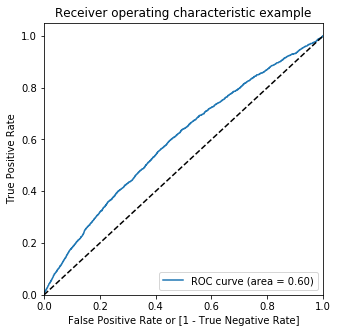

In [191]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.60 which is not very good.

In [192]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/100 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0,0.0,0.021184,0,1,1,1,0,0,0,0,0,0,0
1,0.0,0.022904,0,1,1,1,0,0,0,0,0,0,0
2,0.0,0.047920,0,1,1,1,1,1,0,0,0,0,0
3,0.0,0.046198,0,1,1,1,1,1,0,0,0,0,0
4,0.0,0.038415,0,1,1,1,1,0,0,0,0,0,0


In [193]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.041479  1.000000  0.000000
0.01  0.01  0.041479  1.000000  0.000000
0.02  0.02  0.041708  0.999497  0.000261
0.03  0.03  0.253773  0.852261  0.227874
0.04  0.04  0.538478  0.607035  0.535511
0.05  0.05  0.740599  0.371357  0.756578
0.06  0.06  0.864286  0.190452  0.893446
0.07  0.07  0.924629  0.082412  0.961075
0.08  0.08  0.950746  0.023618  0.990867
0.09  0.09  0.957375  0.005528  0.998565


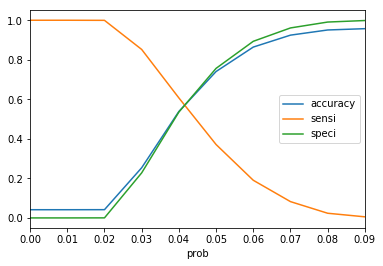

In [194]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal cutoff is around 0.043

In [195]:
#Let us now find the accuracy scre using the actual cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.043 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,final_predicted
0,0.0,0.021184,0,1,1,1,0,0,0,0,0,0,0,0
1,0.0,0.022904,0,1,1,1,0,0,0,0,0,0,0,0
2,0.0,0.047920,0,1,1,1,1,1,0,0,0,0,0,1
3,0.0,0.046198,0,1,1,1,1,1,0,0,0,0,0,1
4,0.0,0.038415,0,1,1,1,1,0,0,0,0,0,0,0


In [196]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6015716191429048

In [197]:
# predict churn on test data
y_pred = model.predict(X_test_demo_woe1)

# create onfusion matrix
cm = confusion_matrix(y_test_demo_woe1, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_demo_woe1, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test_demo_woe1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test_demo_woe1, y_pred_prob),2))

[[11017  8644]
 [  412   489]]
Sensitivity: 	0.54
Specificity: 	0.56
AUC:    	 0.57


### Model 2: Random Forest- Demographic WOE dataset

In [198]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [199]:
# fit model
model.fit(X_train_demo_woe1, y_train_demo_woe1)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   10.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [200]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.5184453401243669
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


In [201]:
# predict churn on test data
y_pred = model.predict(X_test_demo_woe1)

# create onfusion matrix
cm = confusion_matrix(y_test_demo_woe1, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test_demo_woe1, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test_demo_woe1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test_demo_woe1, y_pred_prob),2))

[[18309  1352]
 [  817    84]]
Sensitivity: 	0.09
Specificity: 	0.93
AUC:    	 0.52


In [202]:
model.score(X_train_demo_woe1, y_train_demo_woe1)

0.934040510909263

### Model 3: Logistic Regression- Merged WOE dataset

In [203]:
woe_data.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,-0.012851,0.007390,-0.241692,0.209176,-0.123545,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481
1,0.038230,-0.014364,-0.264577,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,-0.014025,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
2,0.038230,0.007390,-0.264577,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,-0.022932,-0.015821,-0.002282,0.001167,0.001082,-0.002481
3,-0.012851,0.007390,-0.264577,0.209176,-0.123545,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,0.007463,0.087476,0.004747,-0.002282,0.001167,0.001082,-0.002481
4,0.038230,-0.014364,-0.241692,0.209176,-0.076501,0.0,-0.036702,-0.122728,-0.200955,-0.135219,...,-0.000206,-0.00117,0.001208,-0.014025,-0.022932,0.004747,-0.002282,0.001167,0.001082,-0.002481


In [204]:
# Import library to split the dataset into test and train

from sklearn.model_selection import train_test_split

In [205]:
# Putting feature variable to X
X = woe_data.drop(['Performance Tag'],axis=1)
# Putting response variable to y
y = woe_data['Performance Tag']

In [206]:
# Splitting the data into train and test
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [207]:
import statsmodels.api as sm

In [208]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [209]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train1, y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [210]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train1)
logm1 = sm.GLM(y_train1,(sm.add_constant(X_train1)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                47976
Model:                            GLM   Df Residuals:                    47941
Model Family:                Binomial   Df Model:                           34
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7879.5
Date:                Mon, 23 Dec 2019   Deviance:                       15759.
Time:                        19:00:50   Pearson chi2:                 4.76e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1473      0.024   -129.089      0.000      -3.195      -3.099
Age                                                                 0.5885      0.834      0.705      0.481      -1.047       2.224
No of dependents                                                    0.0585      2.301      0.025      0.980      -4.452       4.569
Income                                                              0.1281      0.125      1.024      0.306      -0.117       0.373
No of months in current residence                                  -0.0998      0.118     -0.848      0.396      -0.331       0.131
No of months in current company                                     0.7624      0.204      3.744      0.000       0.363       1.162
No of times 90 DPD or worse in last 6 months                        0.1414      0.138      1.028      0.304      -0.128       0.411
No of times 60 DPD or worse in last 6 months                       -0.0537      0.124     -0.434      0.664      -0.296       0.189
No of times 30 DPD or worse in last 6 months                        0.0558      0.119      0.467      0.640      -0.178       0.290
No of times 90 DPD or worse in last 12 months                       0.0417      0.091      0.459      0.646      -0.136       0.220
No of times 60 DPD or worse in last 12 months                       0.0491      0.101      0.488      0.626      -0.148       0.246
No of times 30 DPD or worse in last 12 months                       0.3351      0.095      3.522      0.000       0.149       0.522
Avgas CC Utilization in last 12 months                              0.4835      0.064      7.596      0.000       0.359       0.608
No of trades opened in last 6 months                               -0.2127      0.124     -1.713      0.087      -0.456       0.031
No of trades opened in last 12 months                               0.2251      0.088      2.568      0.010       0.053       0.397
No of PL trades opened in last 6 months                             0.1861      0.111      1.675      0.094      -0.032       0.404
No of PL trades opened in last 12 months                            0.2545      0.099      2.582      0.010       0.061       0.448
No of Inquiries in last 6 months (excluding home & auto loans)     -0.1410      0.097     -1.460      0.144      -0.330       0.048
No of Inquiries in last 12 months (excluding home & auto loans)     0.4529      0.088      5.175      0.000       0.281       0.624
Presence of open home loan                                          0.0049      0.231      0.021      0.983      -0.448       0.458
Outstanding Balance                            

In [211]:
pca = PCA()
pca.fit(X_train1)
churn_pca = pca.fit_transform(X_train1)

In [212]:
print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0      52.82
1      66.88
2      74.71
3      80.86
4      84.02
5      85.89
6      87.68
7      89.30
8      90.92
9      92.43
10     93.88
11     95.22
12     96.28
13     97.20
14     97.97
15     98.61
16     99.14
17     99.61
18     99.71
19     99.80
20     99.87
21     99.91
22     99.94
23     99.96
24     99.97
25     99.98
26     99.99
27     99.99
28    100.00
29    100.00
30    100.00
31    100.00
32    100.00
33    100.00
dtype: float64


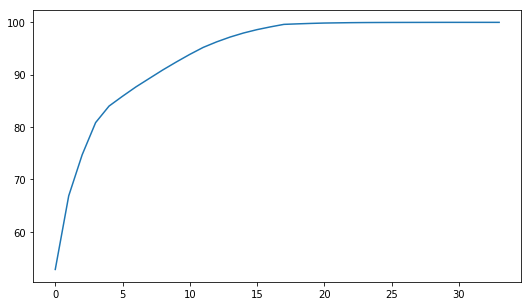

In [213]:
# plot feature variance
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

In [214]:
# create pipeline
PCA_VARS = 27
steps = [("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [215]:
# fit model
pipeline.fit(X_train1, y_train1)

# check score on train data
pipeline.score(X_train1, y_train1)

0.5726404869101217

In [216]:
# predict churn on test data
y_pred = pipeline.predict(X_test1)

# create onfusion matrix
cm = confusion_matrix(y_test1, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test1, y_pred_prob),2))

[[10992  8669]
 [  282   619]]
Sensitivity: 	0.69
Specificity: 	0.56
AUC:    	 0.67


In [217]:
# class imbalance
y_train1.value_counts()/y_train1.shape

0.0    0.958521
1.0    0.041479
Name: Performance Tag, dtype: float64

In [218]:
#Handling class imbalance using SMOTE
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state = 2) 
X_train_res, y_train_res = sm.fit_sample(X_train1, y_train1.ravel())

In [219]:
# PCA
pca = PCA()

# logistic regression 
logistic = LogisticRegression()

# create pipeline
steps = [("pca", pca),
         ("logistic", logistic)
        ]

# compile pipeline
pca_logistic = Pipeline(steps)

# hyperparameter space
params = {'pca__n_components': [23,24,25,26,27], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [220]:
model.fit(X_train_res, y_train_res.ravel())

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight=None,
                                                           dual=False,
                                                           fit_intercept=True,
                                                           int...
                                       

In [221]:
# cross validation results
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.192165,0.054056,0.025428,0.006754,0.1,l1,23,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.677386,0.678909,0.690729,0.678551,0.679749,0.681065,0.004891,77
1,1.179121,0.030298,0.027015,0.003937,0.1,l1,24,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.677386,0.678909,0.690729,0.678552,0.679749,0.681065,0.004891,78
2,1.195840,0.053572,0.024577,0.003894,0.1,l1,25,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.677385,0.678909,0.690729,0.678551,0.679749,0.681065,0.004891,80
3,1.202083,0.052471,0.027835,0.003931,0.1,l1,26,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.677385,0.678909,0.690729,0.678551,0.679749,0.681065,0.004891,79
4,1.190148,0.016760,0.026185,0.004921,0.1,l1,27,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",0.677386,0.678909,0.690729,0.678552,0.679748,0.681065,0.004891,76
5,1.789008,0.053875,0.026192,0.004228,0.1,l2,23,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.677669,0.679157,0.691124,0.678665,0.680016,0.681326,0.004958,71
6,1.837081,0.018010,0.027482,0.003786,0.1,l2,24,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.677658,0.679133,0.691133,0.678663,0.679975,0.681312,0.004967,74
7,1.981464,0.104048,0.024870,0.005516,0.1,l2,25,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.677664,0.679119,0.691144,0.678681,0.679913,0.681304,0.004973,75
8,1.956213,0.077569,0.024173,0.004231,0.1,l2,26,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.677663,0.679116,0.691124,0.678739,0.679960,0.681320,0.004957,72
9,1.912072,0.016771,0.024770,0.003413,0.1,l2,27,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.677665,0.679113,0.691125,0.678727,0.679959,0.681318,0.004959,73


In [222]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.6814200306289853
Best hyperparameters:  {'logistic__C': 0.5, 'logistic__penalty': 'l2', 'pca__n_components': 23}


In [223]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

         0.0       0.97      0.56      0.71     19661
         1.0       0.07      0.69      0.12       901

    accuracy                           0.56     20562
   macro avg       0.52      0.62      0.42     20562
weighted avg       0.94      0.56      0.68     20562



In [224]:
# predict churn on test data
y_pred = model.predict(X_test1)

# create onfusion matrix
cm = confusion_matrix(y_test1, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test1, y_pred_prob),2))

[[10957  8704]
 [  276   625]]
Sensitivity: 	0.69
Specificity: 	0.56
AUC:    	 0.66


In [225]:
# Use 'predict' to predict the probabilities on the train set


y_train_pred = res.predict(X_train_sm)
y_train_pred[:10].sort_values(ascending= False)

47796    0.050077
34465    0.046495
38903    0.036765
30695    0.034055
46226    0.025655
11929    0.016816
21017    0.016094
10531    0.015687
3338     0.012632
14053    0.010883
dtype: float64

In [226]:
# Reshaping it into an array

y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01088268, 0.04649537, 0.02565492, 0.05007717, 0.01609352,
       0.03405508, 0.01681571, 0.03676471, 0.01568702, 0.01263188])

In [227]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train1.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.010883
1,0.0,0.046495
2,0.0,0.025655
3,0.0,0.050077
4,0.0,0.016094


In [228]:
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0.0,0.010883,0
1,0.0,0.046495,0
2,0.0,0.025655,0
3,0.0,0.050077,0
4,0.0,0.016094,0


#### Plotting ROC Curve

In [229]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [230]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [231]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

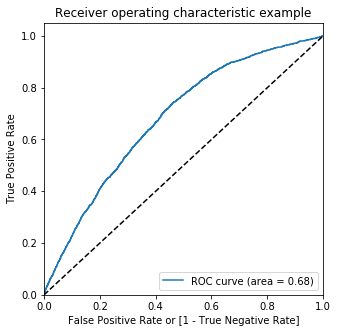

In [232]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.68 which is better than the demographic dataset

In [233]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/100 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0,0.0,0.010883,0,1,1,0,0,0,0,0,0,0,0
1,0.0,0.046495,0,1,1,1,1,1,0,0,0,0,0
2,0.0,0.025655,0,1,1,1,0,0,0,0,0,0,0
3,0.0,0.050077,0,1,1,1,1,1,1,0,0,0,0
4,0.0,0.016094,0,1,1,0,0,0,0,0,0,0,0


In [234]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.041479  1.000000  0.000000
0.01  0.01  0.041771  1.000000  0.000304
0.02  0.02  0.338899  0.901005  0.314574
0.03  0.03  0.448641  0.832161  0.432045
0.04  0.04  0.560947  0.723116  0.553929
0.05  0.05  0.650492  0.605528  0.652438
0.06  0.06  0.761151  0.447739  0.774714
0.07  0.07  0.823849  0.330151  0.845214
0.08  0.08  0.872874  0.226131  0.900861
0.09  0.09  0.915812  0.124623  0.950050


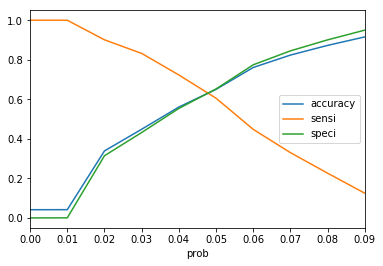

In [235]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal cutoff is around 0.051

In [236]:
#Let us now find the accuracy scre using the actual cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.051 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,final_predicted
0,0.0,0.010883,0,1,1,0,0,0,0,0,0,0,0,0
1,0.0,0.046495,0,1,1,1,1,1,0,0,0,0,0,0
2,0.0,0.025655,0,1,1,1,0,0,0,0,0,0,0,0
3,0.0,0.050077,0,1,1,1,1,1,1,0,0,0,0,0
4,0.0,0.016094,0,1,1,0,0,0,0,0,0,0,0,0


In [237]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6639361347340337

In [238]:
# predict churn on test data
y_pred = model.predict(X_test1)

# create onfusion matrix
cm = confusion_matrix(y_test1, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test1, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test1)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test1, y_pred_prob),2))

[[10957  8704]
 [  276   625]]
Sensitivity: 	0.69
Specificity: 	0.56
AUC:    	 0.66


### Model 4: Random Forest- Merged WOE dataset

In [239]:
# Splitting the data into train and test
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [240]:
# random forest - the class weight is used to handle class imbalance - it adjusts the cost function
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# hyperparameter space
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [241]:
# fit model
model.fit(X_train3, y_train3)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:   13.2s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True,
                                              class_weight={0: 0.1, 1: 0.9},
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False,
                                

In [242]:
# print best hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.5556380675462097
Best hyperparameters:  {'criterion': 'gini', 'max_features': 'auto'}


In [243]:
# predict churn on test data
y_pred = model.predict(X_test3)

# create onfusion matrix
cm = confusion_matrix(y_test3, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test3, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = model.predict_proba(X_test3)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test3, y_pred_prob),2))

[[19610    51]
 [  898     3]]
Sensitivity: 	0.0
Specificity: 	1.0
AUC:    	 0.56


In [244]:
model.score(X_train3, y_train3)

0.9987604977875066

### Model 5: Logistic Regression on Master dataset with IV Values only

In [245]:
iv = pd.read_csv("test.csv", sep=",")

In [246]:
iv_data = iv[iv['IV'] > 0.1]

In [247]:
iv_data.head(10)

,Unnamed: 0,VAR_NAME,IV
1,1,Avgas CC Utilization in last 12 months,0.298145
9,9,No of Inquiries in last 12 months (excluding h...,0.241601
11,11,No of PL trades opened in last 12 months,0.180719
12,12,No of PL trades opened in last 6 months,0.127022
16,16,No of times 30 DPD or worse in last 12 months,0.190898
17,17,No of times 30 DPD or worse in last 6 months,0.146957
18,18,No of times 60 DPD or worse in last 12 months,0.139462
22,22,No of trades opened in last 12 months,0.272169
30,30,Total No of Trades,0.148501


In [248]:
woe_data1 = master_woe[['Avgas CC Utilization in last 12 months','No of Inquiries in last 12 months (excluding home & auto loans)',
                      'No of PL trades opened in last 12 months','No of PL trades opened in last 6 months',
                      'No of times 30 DPD or worse in last 12 months','No of times 30 DPD or worse in last 6 months',
                      'No of times 60 DPD or worse in last 12 months','No of trades opened in last 12 months','Total No of Trades',
                       'Performance Tag']]

In [249]:
# Putting feature variable to X
X = woe_data1.drop(['Performance Tag'],axis=1)
# Putting response variable to y
y = woe_data1['Performance Tag']

In [250]:
from sklearn.model_selection import train_test_split

In [251]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

In [252]:
import statsmodels.api as sm

In [253]:
# Importing LogisticRegression and metrics from sklearn library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [254]:
# Fitting the model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [255]:
# Logistic regression model
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                47976
Model:                            GLM   Df Residuals:                    47966
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7899.5
Date:                Mon, 23 Dec 2019   Deviance:                       15799.
Time:                        19:12:56   Pearson chi2:                 4.75e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1443      0.024   -129.531      0.000      -3.192      -3.097
Avgas CC Utilization in last 12 months                              0.5095      0.059      8.643      0.000       0.394       0.625
No of Inquiries in last 12 months (excluding home & auto loans)     0.3971      0.078      5.075      0.000       0.244       0.550
No of PL trades opened in last 12 months                            0.2190      0.097      2.266      0.023       0.030       0.408
No of PL trades opened in last 6 months                             0.0490      0.094      0.519      0.604      -0.136       0.234
No of times 30 DPD or worse in last 12 months                       0.3527      0.093      3.779      0.000       0.170       0.536
No of times 30 DPD or worse in last 6 months                        0.0661      0.106      0.622      0.534      -0.142       0.274
No of times 60 DPD or worse in last 12 months                       0.0673      0.091      0.738      0.461      -0.112       0.246
No of trades opened in last 12 months                               0.2165      0.087      2.476      0.013       0.045       0.388
Total No of Trades                                                 -0.1526      0.107     -1.430      0.153      -0.362       0.056
===================================================================================================================================
"""

In [256]:
# Feature Selection using RFE
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [257]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Avgas CC Utilization in last 12 months', True, 1),
 ('No of Inquiries in last 12 months (excluding home & auto loans)', True, 1),
 ('No of PL trades opened in last 12 months', True, 1),
 ('No of PL trades opened in last 6 months', True, 1),
 ('No of times 30 DPD or worse in last 12 months', True, 1),
 ('No of times 30 DPD or worse in last 6 months', True, 1),
 ('No of times 60 DPD or worse in last 12 months', True, 1),
 ('No of trades opened in last 12 months', True, 1),
 ('Total No of Trades', True, 1)]

In [258]:

col = X_train.columns[rfe.support_]

In [259]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

In [260]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                47976
Model:                            GLM   Df Residuals:                    47966
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7899.5
Date:                Mon, 23 Dec 2019   Deviance:                       15799.
Time:                        19:12:57   Pearson chi2:                 4.75e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1443      0.024   -129.531      0.000      -3.192      -3.097
Avgas CC Utilization in last 12 months                              0.5095      0.059      8.643      0.000       0.394       0.625
No of Inquiries in last 12 months (excluding home & auto loans)     0.3971      0.078      5.075      0.000       0.244       0.550
No of PL trades opened in last 12 months                            0.2190      0.097      2.266      0.023       0.030       0.408
No of PL trades opened in last 6 months                             0.0490      0.094      0.519      0.604      -0.136       0.234
No of times 30 DPD or worse in last 12 months                       0.3527      0.093      3.779      0.000       0.170       0.536
No of times 30 DPD or worse in last 6 months                        0.0661      0.106      0.622      0.534      -0.142       0.274
No of times 60 DPD or worse in last 12 months                       0.0673      0.091      0.738      0.461      -0.112       0.246
No of trades opened in last 12 months                               0.2165      0.087      2.476      0.013       0.045       0.388
Total No of Trades                                                 -0.1526      0.107     -1.430      0.153      -0.362       0.056
===================================================================================================================================
"""

In [261]:
col = col.drop('No of PL trades opened in last 6 months', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                47976
Model:                            GLM   Df Residuals:                    47967
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7899.6
Date:                Mon, 23 Dec 2019   Deviance:                       15799.
Time:                        19:12:57   Pearson chi2:                 4.75e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1443      0.024   -129.531      0.000      -3.192      -3.097
Avgas CC Utilization in last 12 months                              0.5097      0.059      8.646      0.000       0.394       0.625
No of Inquiries in last 12 months (excluding home & auto loans)     0.3962      0.078      5.066      0.000       0.243       0.550
No of PL trades opened in last 12 months                            0.2345      0.092      2.555      0.011       0.055       0.414
No of times 30 DPD or worse in last 12 months                       0.3523      0.093      3.776      0.000       0.169       0.535
No of times 30 DPD or worse in last 6 months                        0.0662      0.106      0.623      0.533      -0.142       0.274
No of times 60 DPD or worse in last 12 months                       0.0674      0.091      0.738      0.460      -0.112       0.246
No of trades opened in last 12 months                               0.2192      0.087      2.512      0.012       0.048       0.390
Total No of Trades                                                 -0.1346      0.101     -1.338      0.181      -0.332       0.063
===================================================================================================================================
"""

In [262]:
col = col.drop('No of times 30 DPD or worse in last 6 months', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                47976
Model:                            GLM   Df Residuals:                    47968
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7899.8
Date:                Mon, 23 Dec 2019   Deviance:                       15800.
Time:                        19:12:58   Pearson chi2:                 4.75e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1443      0.024   -129.532      0.000      -3.192      -3.097
Avgas CC Utilization in last 12 months                              0.5086      0.059      8.631      0.000       0.393       0.624
No of Inquiries in last 12 months (excluding home & auto loans)     0.3966      0.078      5.071      0.000       0.243       0.550
No of PL trades opened in last 12 months                            0.2348      0.092      2.559      0.011       0.055       0.415
No of times 30 DPD or worse in last 12 months                       0.3870      0.074      5.206      0.000       0.241       0.533
No of times 60 DPD or worse in last 12 months                       0.0906      0.083      1.089      0.276      -0.072       0.254
No of trades opened in last 12 months                               0.2188      0.087      2.507      0.012       0.048       0.390
Total No of Trades                                                 -0.1348      0.101     -1.339      0.180      -0.332       0.062
===================================================================================================================================
"""

In [263]:
col = col.drop('No of times 60 DPD or worse in last 12 months', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                47976
Model:                            GLM   Df Residuals:                    47969
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7900.4
Date:                Mon, 23 Dec 2019   Deviance:                       15801.
Time:                        19:12:58   Pearson chi2:                 4.75e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1443      0.024   -129.533      0.000      -3.192      -3.097
Avgas CC Utilization in last 12 months                              0.5125      0.059      8.715      0.000       0.397       0.628
No of Inquiries in last 12 months (excluding home & auto loans)     0.3979      0.078      5.091      0.000       0.245       0.551
No of PL trades opened in last 12 months                            0.2366      0.092      2.579      0.010       0.057       0.416
No of times 30 DPD or worse in last 12 months                       0.4417      0.054      8.122      0.000       0.335       0.548
No of trades opened in last 12 months                               0.2183      0.087      2.502      0.012       0.047       0.389
Total No of Trades                                                 -0.1341      0.101     -1.332      0.183      -0.331       0.063
===================================================================================================================================
"""

In [264]:
col = col.drop('Total No of Trades', 1)
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                47976
Model:                            GLM   Df Residuals:                    47970
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7901.3
Date:                Mon, 23 Dec 2019   Deviance:                       15803.
Time:                        19:12:58   Pearson chi2:                 4.75e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.1444      0.024   -129.554      0.000      -3.192      -3.097
Avgas CC Utilization in last 12 months                              0.5227      0.058      8.958      0.000       0.408       0.637
No of Inquiries in last 12 months (excluding home & auto loans)     0.3895      0.078      5.001      0.000       0.237       0.542
No of PL trades opened in last 12 months                            0.1650      0.074      2.229      0.026       0.020       0.310
No of times 30 DPD or worse in last 12 months                       0.4369      0.054      8.051      0.000       0.331       0.543
No of trades opened in last 12 months                               0.1898      0.085      2.242      0.025       0.024       0.356
===================================================================================================================================
"""

In [265]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

14053    0.013723
34465    0.057585
46226    0.026696
47796    0.053871
21017    0.013723
30695    0.035999
11929    0.015395
38903    0.035999
10531    0.015395
3338     0.013723
dtype: float64

In [266]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.01372313, 0.05758459, 0.0266956 , 0.05387054, 0.01372313,
       0.0359994 , 0.01539517, 0.0359994 , 0.01539517, 0.01372313])

In [267]:
# Converted ==1 is default
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.013723
1,0.0,0.057585
2,0.0,0.026696
3,0.0,0.053871
4,0.0,0.013723


In [268]:
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.038 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0.0,0.013723,0
1,0.0,0.057585,1
2,0.0,0.026696,0
3,0.0,0.053871,1
4,0.0,0.013723,0


In [269]:
from sklearn import metrics

In [270]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[25477 20509]
 [  558  1432]]


#### Plotting ROC Curve

In [271]:
# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [272]:
fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [273]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

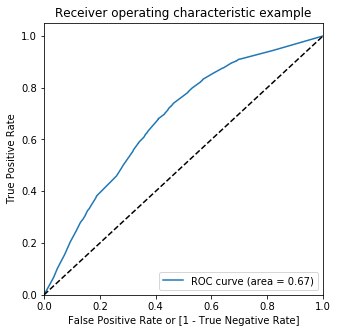

In [274]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under ROC curve is 0.67 which is slightly lesser than the merged dataset.

In [275]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/100 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09
0,0.0,0.013723,0,1,1,0,0,0,0,0,0,0,0
1,0.0,0.057585,1,1,1,1,1,1,1,0,0,0,0
2,0.0,0.026696,0,1,1,1,0,0,0,0,0,0,0
3,0.0,0.053871,1,1,1,1,1,1,1,0,0,0,0
4,0.0,0.013723,0,1,1,0,0,0,0,0,0,0,0


In [276]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

      prob  accuracy     sensi     speci
0.00  0.00  0.041479  1.000000  0.000000
0.01  0.01  0.041479  1.000000  0.000000
0.02  0.02  0.335272  0.904020  0.310660
0.03  0.03  0.448182  0.831156  0.431610
0.04  0.04  0.572307  0.702010  0.566694
0.05  0.05  0.633859  0.622111  0.634367
0.06  0.06  0.794793  0.377889  0.812834
0.07  0.07  0.817284  0.332663  0.838255
0.08  0.08  0.844589  0.280905  0.868982
0.09  0.09  0.928568  0.066834  0.965859


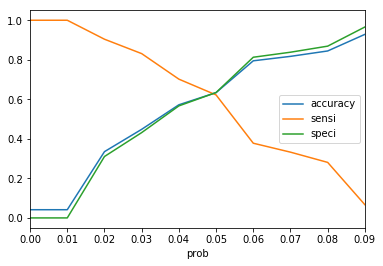

In [277]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

The optimal cutoff is around 0.05

In [278]:
#Let us now find the accuracy scre using the actual cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.05 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,final_predicted
0,0.0,0.013723,0,1,1,0,0,0,0,0,0,0,0,0
1,0.0,0.057585,1,1,1,1,1,1,1,0,0,0,0,1
2,0.0,0.026696,0,1,1,1,0,0,0,0,0,0,0,0
3,0.0,0.053871,1,1,1,1,1,1,1,0,0,0,0,1
4,0.0,0.013723,0,1,1,0,0,0,0,0,0,0,0,0


In [279]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.633858595964649

In [280]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[29172, 16814],
       [  752,  1238]], dtype=int64)

In [281]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [282]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6221105527638191

In [283]:
# Let us calculate specificity
TN / float(TN+FP)

0.6343669812551647

In [284]:
#Precision
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.0685796587635719

In [285]:
#Recall
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.6221105527638191

### From the above models, we can conclude that logistic regression model for merged dataset has performed better

## Model Evaluation

In [286]:
X_test1 = X_test1[col]
X_test1.head()

,Avgas CC Utilization in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),No of PL trades opened in last 12 months,No of times 30 DPD or worse in last 12 months,No of trades opened in last 12 months
63319,0.367839,0.183836,0.393790,-0.273585,0.365275
67098,0.500984,0.183836,0.393790,0.708974,0.365275
53567,0.500984,0.183836,0.393790,-0.273585,0.229425
66315,0.367839,0.365101,0.393790,0.708974,0.229425
26830,-0.574256,-0.879423,-0.465916,-0.273585,0.229425


In [287]:
X_test_sm = sm.add_constant(X_test1)

In [288]:
y_test_pred = res.predict(X_test_sm)

In [289]:
y_test_pred[:10]

63319    0.053871
67098    0.085730
53567    0.056148
66315    0.083809
26830    0.019077
45348    0.030841
59194    0.089309
26929    0.023112
40768    0.049086
12263    0.013723
dtype: float64

In [290]:
y_test_pred = y_test_pred.values.reshape(-1)
y_test_pred[:10]

array([0.05387054, 0.08572982, 0.05614763, 0.08380852, 0.01907743,
       0.03084084, 0.08930907, 0.02311165, 0.0490861 , 0.01372313])

In [291]:
y_test_pred_final = pd.DataFrame({'Converted':y_test.values, 'Conversion_Prob':y_test_pred})
y_test_pred_final.head()

,Converted,Conversion_Prob
0,0.0,0.053871
1,0.0,0.085730
2,0.0,0.056148
3,0.0,0.083809
4,0.0,0.019077


In [292]:
y_test_pred_final['predicted'] = y_test_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.06 else 0)

# Let's see the head
y_test_pred_final.head()

,Converted,Conversion_Prob,predicted
0,0.0,0.053871,0
1,0.0,0.085730,1
2,0.0,0.056148,0
3,0.0,0.083809,1
4,0.0,0.019077,0


In [293]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_test_pred_final.Converted, y_test_pred_final.predicted )
print(confusion)

[[15847  3814]
 [  549   352]]


In [294]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_test_pred_final.Converted, y_test_pred_final.predicted))

0.7878124696041241


## Application Scorecard

In [295]:
# Score Logic
target_score = 400
target_odds = 10
pts_double_odds = 20

factor = pts_double_odds/np.log(2)
offset = target_score - factor*np.log(target_odds)

In [296]:
y_train_pred_final['App_score'] = offset - factor*y_train_pred_final['Conversion_Prob']
y_train_pred_final.head()

,Converted,Conversion_Prob,predicted,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,final_predicted,App_score
0,0.0,0.013723,0,1,1,0,0,0,0,0,0,0,0,0,333.165472
1,0.0,0.057585,1,1,1,1,1,1,1,0,0,0,0,1,331.899898
2,0.0,0.026696,0,1,1,1,0,0,0,0,0,0,0,0,332.791166
3,0.0,0.053871,1,1,1,1,1,1,1,0,0,0,0,1,332.007063
4,0.0,0.013723,0,1,1,0,0,0,0,0,0,0,0,0,333.165472


In [297]:
y_test_pred_final['App_score'] = offset - factor*y_test_pred_final['Conversion_Prob']
y_test_pred_final.head()

,Converted,Conversion_Prob,predicted,App_score
0,0.0,0.053871,0,332.007063
1,0.0,0.085730,1,331.087798
2,0.0,0.056148,0,331.941360
3,0.0,0.083809,1,331.143235
4,0.0,0.019077,0,333.010980


In [298]:
# Let us apply WOE on the rejected dataset.

In [299]:
transform_vars_list_data = master_rejected.columns.difference([''])
transform_prefix_data = '' 

In [300]:
transform_vars_list_data

Index(['Age', 'Avgas CC Utilization in last 12 months', 'Education_Masters',
       'Education_Others', 'Education_Phd', 'Education_Professional',
       'Gender_M', 'Income', 'Marital Status_Single',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'No of Inquiries in last 6 months (excluding home & auto loans)',
       'No of PL trades opened in last 12 months',
       'No of PL trades opened in last 6 months', 'No of dependents',
       'No of months in current company', 'No of months in current residence',
       'No of times 30 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 90 DPD or worse in last 12 months',
       'No of times 90 DPD or worse in last 6 months',
       'No of trades opened in last 12 months',
       'No of trades opened in last 6 months', 'Outstanding Balance',
 

In [301]:
master_rejected

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,...,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
69600,35,1.0,6.0,22,18,NaN,0,0,2,1,...,0,0,0,0,0,0,0,0,0,1
69601,47,4.0,12.0,122,25,NaN,1,1,1,3,...,1,0,0,0,1,0,0,0,0,1
69602,46,3.0,7.0,10,31,NaN,3,4,5,3,...,0,0,0,1,1,0,0,0,0,1
69603,41,3.0,18.0,6,47,NaN,1,3,4,3,...,1,0,0,0,0,0,0,0,0,1
69604,42,4.0,17.0,8,49,NaN,2,2,4,3,...,0,0,1,0,0,0,0,0,0,1
69605,46,5.0,18.0,61,72,NaN,2,2,3,2,...,0,0,0,0,1,0,0,0,0,1
69606,29,2.0,7.0,38,18,NaN,1,2,3,3,...,0,0,0,1,0,1,0,0,0,1
69607,57,3.0,16.0,59,66,NaN,1,3,5,1,...,0,0,0,1,0,0,0,0,0,1
69608,39,3.0,4.5,75,4,NaN,2,2,3,4,...,0,0,0,0,0,0,0,0,0,1
69609,43,4.0,24.0,6,3,NaN,2,2,3,3,...,0,0,0,0,0,0,0,0,0,1


In [302]:
master_rejected = master_rejected.rename(columns={'Profession _SE': 'Profession_SE'})
master_rejected = master_rejected.rename(columns={'Profession _SE_PROF': 'Profession_SE_PROF'})

In [303]:
for var in transform_vars_list:
    small_df = final_iv[final_iv['VAR_NAME'] == var]
    transform_dict = dict(zip(small_df.MAX_VALUE,small_df.WOE))
    replace_cmd = ''
    replace_cmd1 = ''
    for i in sorted(transform_dict.items()):
        replace_cmd = replace_cmd + str(i[1]) + str(' if x <= ') + str(i[0]) + ' else '
        replace_cmd1 = replace_cmd1 + str(i[1]) + str(' if x == "') + str(i[0]) + '" else '
    replace_cmd = replace_cmd + '0'
    replace_cmd1 = replace_cmd1 + '0'
    if replace_cmd != '0':
        try:
            master_rejected[transform_prefix + var] = master_rejected[var].apply(lambda x: eval(replace_cmd))
        except:
            master_rejected[transform_prefix + var] = master_rejected[var].apply(lambda x: eval(replace_cmd1))

In [304]:
X_reject = master_rejected[col]
X_reject.head()

,Avgas CC Utilization in last 12 months,No of Inquiries in last 12 months (excluding home & auto loans),No of PL trades opened in last 12 months,No of times 30 DPD or worse in last 12 months,No of trades opened in last 12 months
69600,0.367839,0.183836,0.39379,0.708974,0.365275
69601,0.367839,0.365101,0.39379,0.708974,0.229425
69602,0.500984,0.183836,0.39379,0.708974,0.229425
69603,0.500984,0.365101,0.39379,0.708974,0.229425
69604,0.367839,0.365101,0.39379,0.708974,0.229425


In [305]:
X_reject.shape

(1390, 5)

In [306]:
X_reject_sm = sm.add_constant(X_reject)

In [307]:
y_reject_pred = res.predict(X_reject_sm)

In [308]:
y_reject_pred[:10]

69600    0.080430
69601    0.083809
69602    0.083731
69603    0.089309
69604    0.083809
69605    0.078544
69606    0.068871
69607    0.085730
69608    0.085730
69609    0.091428
dtype: float64

In [309]:
y_reject_pred = pd.DataFrame(y_reject_pred)

In [310]:
y_reject_pred= y_reject_pred.rename(columns={ 0 : 'Conversion_Prob'})

In [311]:
# Score on rejected population
y_reject_pred['score'] = offset - factor*y_reject_pred['Conversion_Prob']
y_reject_pred.head()

,Conversion_Prob,score
69600,0.080430,331.240711
69601,0.083809,331.143235
69602,0.083731,331.145482
69603,0.089309,330.984523
69604,0.083809,331.143235


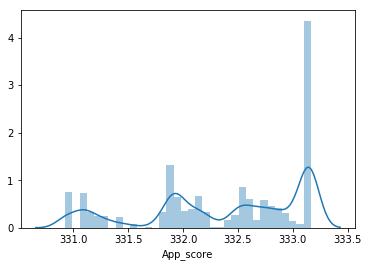

In [312]:
# Score distribution of accepted train population
sns.distplot(y_train_pred_final['App_score'])

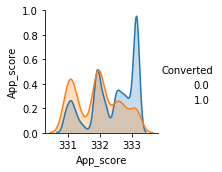

In [313]:
# Distribution of default(red color) and non default (blue color) in accepted train population
ax = sns.pairplot(y_train_pred_final,hue='Converted',vars=['App_score'])

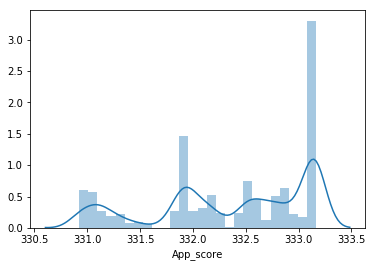

In [314]:
# Score distribution of accepted test population
sns.distplot(y_test_pred_final['App_score'])

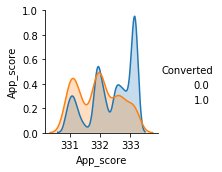

In [315]:
# Distribution of default(red color) and non default (blue color) in accepted test population
sns.pairplot(y_test_pred_final,hue='Converted',vars=['App_score'])

In [316]:
# Combining train and test data 
y_total_pred = pd.concat([y_train_pred_final, y_test_pred_final])

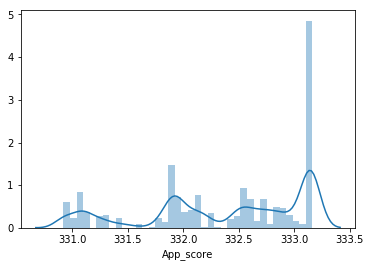

In [317]:
# Score distribution of total accepted population
sns.distplot(y_total_pred['App_score'])

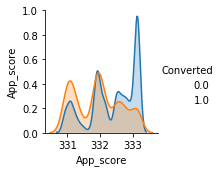

In [318]:
# Distribution of default(red color) and non default (blue color) in total accepted population
sns.pairplot(y_total_pred,hue='Converted',vars=['App_score'])

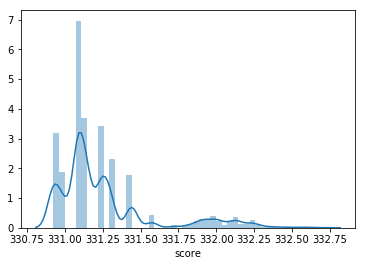

In [319]:
# Score distribution in rejected population
sns.distplot(y_reject_pred['score'])

#### When we see the above plots, we can see that most of the rejected population has a score less that 331.7 and most of the accepted population has a score greater than 331.7. Hence let us keep 331.7 as the cutoff score.

In [320]:
# Using model auto accept from accepted population
accept_model1 = y_total_pred[y_total_pred['App_score'] >= 331.7]
accept_model1.shape

(56471, 15)

In [321]:
# Using model auto accept from rejected population
accept_model2 = y_reject_pred[y_reject_pred['score'] >= 331.7]
accept_model2.shape

(167, 2)

In [322]:
#Let us find the defaulters rate in the accpeted model- it is 3.25%
defaulters_accepted = accept_model1[accept_model1['Converted'] == 1]
defaulters_accepted_rate = defaulters_accepted.shape[0]/accept_model1.shape[0]
print(defaulters_accepted_rate*100)

3.352163057144375


In [323]:
#Let us find the defaulters
default_rejected = y_total_pred[y_total_pred['Converted'] == 1]
default_rejected.shape

(2891, 15)

In [324]:
#We could have given credit card to 1791 out of 2891
defaulters_accepted.shape

(1893, 15)

In [325]:
# Let us find the rate of approval from total applicants is 78.9%
approval_rate = (accept_model1.shape[0] + accept_model2.shape[0])/(y_total_pred.shape[0]+y_reject_pred.shape[0])
print(approval_rate*100)

80.99473744422835


### Financial Benefit

In [326]:
# Using model auto reject from accepted population
reject_model1 = y_total_pred[y_total_pred['App_score'] < 331.7]
reject_model1.shape

(12067, 15)

In [327]:
# Default rate in auto reject population- 8.14%
default_reject = reject_model1[reject_model1['Converted'] == 1]
default_rate = default_reject.shape[0]/reject_model1.shape[0]
print(default_rate*100)

8.270489765476091


In [328]:
# Using model auto reject from rejected population
reject_model2 = y_reject_pred[y_reject_pred['score'] < 331.7]
reject_model2.shape

(1223, 2)

In [329]:
# Difference in default rate between model based accepted vs rejected population - 4.91%
net_benefit_dr = default_rate - defaulters_accepted_rate
print(net_benefit_dr*100)

4.918326708331716


In [330]:
# Assuming 1000 rupees is average default amount per credit card
# Amount saved by using model is 6 lakhs 53 thousand
avg_default_amt = 1000
saving = (reject_model1.shape[0] + reject_model2.shape[0])*net_benefit_dr*avg_default_amt
print(saving)

653645.6195372851


### We can save an amount of 6 lakhs and 53 thousand by using this model